In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [3]:
url = 'https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD'

covid_19_nys_data = pd.read_csv(url)

In [4]:
covid_19_nys_data.head(10)

Test Date       County  New Positives  Cumulative Number of Positives  \
0  04/17/2020       Albany             29                             648   
1  04/17/2020     Allegany              1                              30   
2  04/17/2020        Bronx            984                           28019   
3  04/17/2020       Broome              8                             186   
4  04/17/2020  Cattaraugus              0                              34   
5  04/17/2020       Cayuga              0                              36   
6  04/17/2020   Chautauqua              0                              25   
7  04/17/2020      Chemung              1                              72   
8  04/17/2020     Chenango              1                              77   
9  04/17/2020      Clinton              1                              48   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              291                                  6727  
1                               15                                   348  
2                             2597                                 56443  
3                               64                                  1331  
4                               15                                   454  
5                                9                                   597  
6                               22                                   607  
7                               32                                   884  
8                               11                                   462  
9                               16                                   505

In [5]:
table = covid_19_nys_data.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                ascending=[False, False]).drop_duplicates(subset ="County", 
                                keep = 'first').reset_index(drop=True).head(10)

table['New Positives'] = table['New Positives'].map('{:,}'.format)
table['Cumulative Number of Positives'] = table['Cumulative Number of Positives'].map('{:,}'.format)
table['Total Number of Tests Performed'] = table['Total Number of Tests Performed'].map('{:,}'.format)
table['Cumulative Number of Tests Performed'] = table['Cumulative Number of Tests Performed'].map('{:,}'.format)
table.drop(['Test Date', 'New Positives', 'Total Number of Tests Performed'], axis=1, inplace=True)


print(table.to_markdown())

|    | County      | Cumulative Number of Positives   | Cumulative Number of Tests Performed   |
|---:|:------------|:---------------------------------|:---------------------------------------|
|  0 | Queens      | 40,216                           | 77,066                                 |
|  1 | Kings       | 35,763                           | 72,435                                 |
|  2 | Nassau      | 29,180                           | 66,635                                 |
|  3 | Bronx       | 28,019                           | 56,443                                 |
|  4 | Suffolk     | 26,143                           | 62,928                                 |
|  5 | Westchester | 23,179                           | 69,608                                 |
|  6 | New York    | 17,932                           | 45,111                                 |
|  7 | Richmond    | 9,333                            | 22,247                                 |
|  8 | Rockland    | 9,171    

In [6]:
covid_19_nys_data.shape

(2914, 6)

# Saving source .csv data

In [7]:
print('NYS COVID-19 data as of ' +  
      covid_19_nys_data.sort_values(by='Test Date', 
      ascending=False)['Test Date'].iloc[0] + '.')

NYS COVID-19 data as of 04/17/2020.


In [8]:
covid_19_nys_data.to_csv('data/covid_19_nys_data', index=False)

In [9]:
current_date = covid_19_nys_data.sort_values(by='Test Date', ascending=False)['Test Date'].iloc[0]

In [10]:
current_date

'04/17/2020'

# Begin Analysis

In [11]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0  04/17/2020       Albany             29                             648   
1  04/17/2020     Allegany              1                              30   
2  04/17/2020        Bronx            984                           28019   
3  04/17/2020       Broome              8                             186   
4  04/17/2020  Cattaraugus              0                              34   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              291                                  6727  
1                               15                                   348  
2                             2597                                 56443  
3                               64                                  1331  
4                               15                                   454

In [12]:
covid_19_nys_data.tail()

Test Date       County  New Positives  Cumulative Number of Positives  \
2909  03/02/2020   Washington              0                               0   
2910  03/02/2020        Wayne              0                               0   
2911  03/02/2020  Westchester              1                               1   
2912  03/02/2020      Wyoming              0                               0   
2913  03/02/2020        Yates              0                               0   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  
2909                                0                                     0  
2910                                0                                     0  
2911                                1                                     1  
2912                                0                                     0  
2913                                0                                     0

In [13]:
covid_19_nys_data.columns

Index(['Test Date', 'County', 'New Positives',
       'Cumulative Number of Positives', 'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed'],
      dtype='object')

In [14]:
covid_19_nys_data.dtypes

Test Date                               object
County                                  object
New Positives                            int64
Cumulative Number of Positives           int64
Total Number of Tests Performed          int64
Cumulative Number of Tests Performed     int64
dtype: object

In [15]:
covid_19_nys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Test Date                             2914 non-null   object
 1   County                                2914 non-null   object
 2   New Positives                         2914 non-null   int64 
 3   Cumulative Number of Positives        2914 non-null   int64 
 4   Total Number of Tests Performed       2914 non-null   int64 
 5   Cumulative Number of Tests Performed  2914 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 136.7+ KB


In [16]:
covid_19_nys_data.describe()

New Positives  Cumulative Number of Positives  \
count    2914.000000                     2914.000000   
mean       81.239533                     1163.352780   
std       268.179226                     4426.740992   
min         0.000000                        0.000000   
25%         0.000000                        0.000000   
50%         1.000000                        9.000000   
75%         7.000000                       71.000000   
max      2663.000000                    40216.000000   

       Total Number of Tests Performed  Cumulative Number of Tests Performed  
count                      2914.000000                           2914.000000  
mean                        204.712423                           2998.215854  
std                         581.656444                           9666.557941  
min                           0.000000                              0.000000  
25%                           1.000000                              6.000000  
50%                          12.000000                            150.500000  
75%                          55.000000                            735.500000  
max                        5951.000000                          77066.000000

In [17]:
covid_19_nys_data.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
dtype: int64

In [18]:
covid_19_nys_data.isnull().sum().sum()

0

In [19]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0  04/17/2020       Albany             29                             648   
1  04/17/2020     Allegany              1                              30   
2  04/17/2020        Bronx            984                           28019   
3  04/17/2020       Broome              8                             186   
4  04/17/2020  Cattaraugus              0                              34   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              291                                  6727  
1                               15                                   348  
2                             2597                                 56443  
3                               64                                  1331  
4                               15                                   454

In [20]:
covid_19_nys_data['Test Date'] = pd.to_datetime(covid_19_nys_data['Test Date'], 
                                          infer_datetime_format=True)

In [21]:
covid_19_nys_data.dtypes

Test Date                               datetime64[ns]
County                                          object
New Positives                                    int64
Cumulative Number of Positives                   int64
Total Number of Tests Performed                  int64
Cumulative Number of Tests Performed             int64
dtype: object

In [22]:
epi_curve = covid_19_nys_data.sort_values(by='Test Date')

In [23]:
epi_curve = epi_curve.groupby(by='Test Date')['New Positives'].sum().reset_index()

In [24]:
epi_curve['NewDate'] = epi_curve['Test Date'].dt.strftime("%m-%d")

In [25]:
epi_curve

Test Date  New Positives NewDate
0  2020-03-02              1   03-02
1  2020-03-03              0   03-03
2  2020-03-04              2   03-04
3  2020-03-05             22   03-05
4  2020-03-06             11   03-06
5  2020-03-07             24   03-07
6  2020-03-08             28   03-08
7  2020-03-09             63   03-09
8  2020-03-10             44   03-10
9  2020-03-11             56   03-11
10 2020-03-12            102   03-12
11 2020-03-13            164   03-13
12 2020-03-14            131   03-14
13 2020-03-15            294   03-15
14 2020-03-16            432   03-16
15 2020-03-17           1009   03-17
16 2020-03-18           1769   03-18
17 2020-03-19           2950   03-19
18 2020-03-20           3254   03-20
19 2020-03-21           4812   03-21
20 2020-03-22           5707   03-22
21 2020-03-23           4790   03-23
22 2020-03-24           5145   03-24
23 2020-03-25           6448   03-25
24 2020-03-26           7379   03-26
25 2020-03-27           7681   03-27
26 2020-03-28           7195   03-28
27 2020-03-29           6984   03-29
28 2020-03-30           9298   03-30
29 2020-03-31           7917   03-31
30 2020-04-01           8669   04-01
31 2020-04-02          10482   04-02
32 2020-04-03          10841   04-03
33 2020-04-04           8327   04-04
34 2020-04-05           8658   04-05
35 2020-04-06           8174   04-06
36 2020-04-07          10453   04-07
37 2020-04-08          10621   04-08
38 2020-04-09          10575   04-09
39 2020-04-10           9946   04-10
40 2020-04-11           8236   04-11
41 2020-04-12           6337   04-12
42 2020-04-13           7177   04-13
43 2020-04-14          11571   04-14
44 2020-04-15           8505   04-15
45 2020-04-16           7358   04-16
46 2020-04-17           7090   04-17

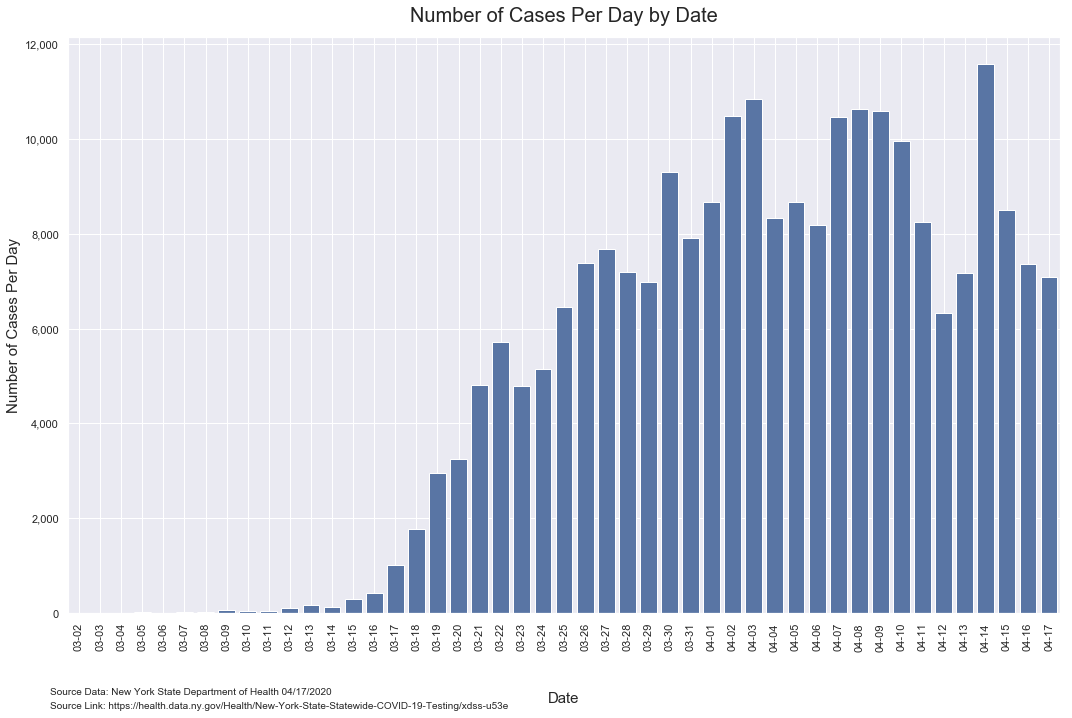

In [26]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.barplot(x="NewDate", 
            y="New Positives",
            color="C0",
            data=epi_curve)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=90)

#ax1.legend_.remove()
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Cases Per Day', fontsize=15)
plt.title('Number of Cases Per Day by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()

In [27]:
epi_curve['3_day_rolling_average'] = epi_curve['New Positives'].rolling(3).mean()

In [28]:
epi_curve

Test Date  New Positives NewDate  3_day_rolling_average
0  2020-03-02              1   03-02                    NaN
1  2020-03-03              0   03-03                    NaN
2  2020-03-04              2   03-04               1.000000
3  2020-03-05             22   03-05               8.000000
4  2020-03-06             11   03-06              11.666667
5  2020-03-07             24   03-07              19.000000
6  2020-03-08             28   03-08              21.000000
7  2020-03-09             63   03-09              38.333333
8  2020-03-10             44   03-10              45.000000
9  2020-03-11             56   03-11              54.333333
10 2020-03-12            102   03-12              67.333333
11 2020-03-13            164   03-13             107.333333
12 2020-03-14            131   03-14             132.333333
13 2020-03-15            294   03-15             196.333333
14 2020-03-16            432   03-16             285.666667
15 2020-03-17           1009   03-17             578.333333
16 2020-03-18           1769   03-18            1070.000000
17 2020-03-19           2950   03-19            1909.333333
18 2020-03-20           3254   03-20            2657.666667
19 2020-03-21           4812   03-21            3672.000000
20 2020-03-22           5707   03-22            4591.000000
21 2020-03-23           4790   03-23            5103.000000
22 2020-03-24           5145   03-24            5214.000000
23 2020-03-25           6448   03-25            5461.000000
24 2020-03-26           7379   03-26            6324.000000
25 2020-03-27           7681   03-27            7169.333333
26 2020-03-28           7195   03-28            7418.333333
27 2020-03-29           6984   03-29            7286.666667
28 2020-03-30           9298   03-30            7825.666667
29 2020-03-31           7917   03-31            8066.333333
30 2020-04-01           8669   04-01            8628.000000
31 2020-04-02          10482   04-02            9022.666667
32 2020-04-03          10841   04-03            9997.333333
33 2020-04-04           8327   04-04            9883.333333
34 2020-04-05           8658   04-05            9275.333333
35 2020-04-06           8174   04-06            8386.333333
36 2020-04-07          10453   04-07            9095.000000
37 2020-04-08          10621   04-08            9749.333333
38 2020-04-09          10575   04-09           10549.666667
39 2020-04-10           9946   04-10           10380.666667
40 2020-04-11           8236   04-11            9585.666667
41 2020-04-12           6337   04-12            8173.000000
42 2020-04-13           7177   04-13            7250.000000
43 2020-04-14          11571   04-14            8361.666667
44 2020-04-15           8505   04-15            9084.333333
45 2020-04-16           7358   04-16            9144.666667
46 2020-04-17           7090   04-17            7651.000000

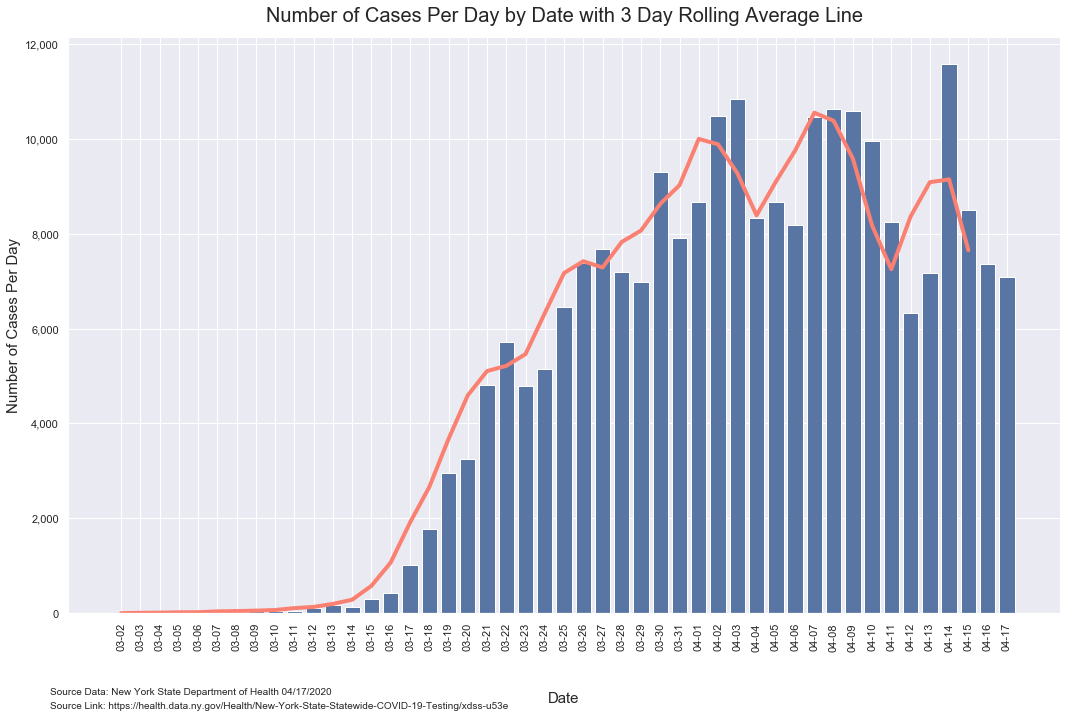

In [29]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.barplot(x="NewDate", 
            y="New Positives",
            color="C0",
            data=epi_curve)

sns.lineplot(x="NewDate", 
            y="3_day_rolling_average",
            color="salmon",
            data=epi_curve, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('D'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=90)

ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Cases Per Day', fontsize=15)
plt.title('Number of Cases Per Day by Date with 3 Day Rolling Average Line', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/epi_curve')

In [30]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0 2020-04-17       Albany             29                             648   
1 2020-04-17     Allegany              1                              30   
2 2020-04-17        Bronx            984                           28019   
3 2020-04-17       Broome              8                             186   
4 2020-04-17  Cattaraugus              0                              34   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              291                                  6727  
1                               15                                   348  
2                             2597                                 56443  
3                               64                                  1331  
4                               15                                   454

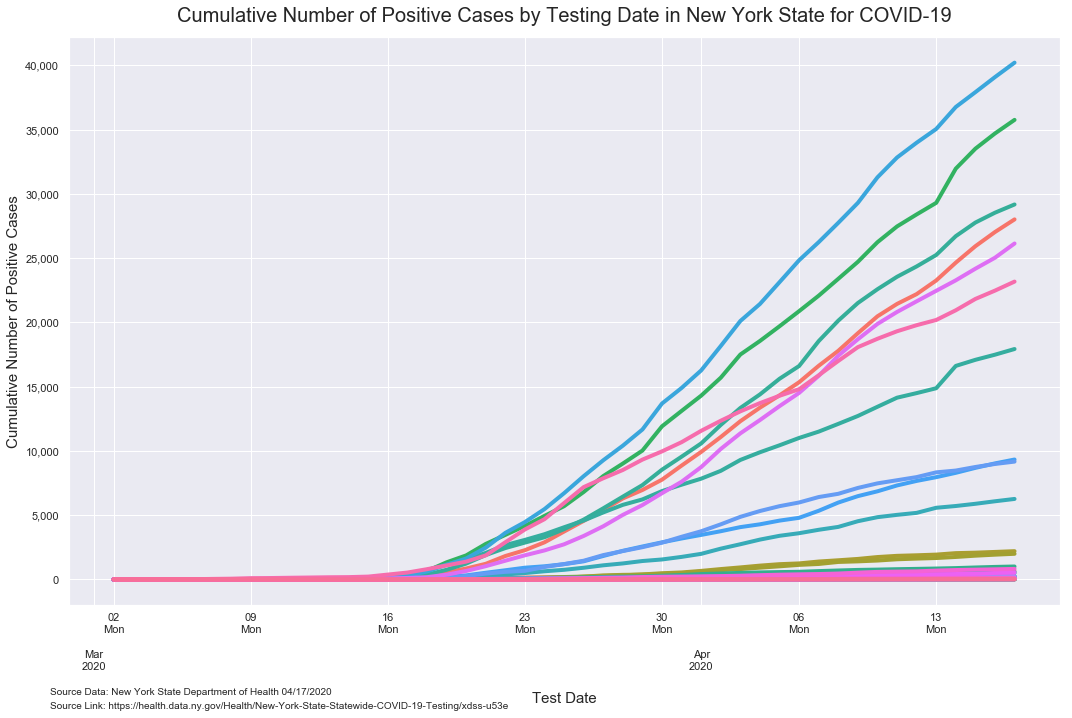

In [31]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county')

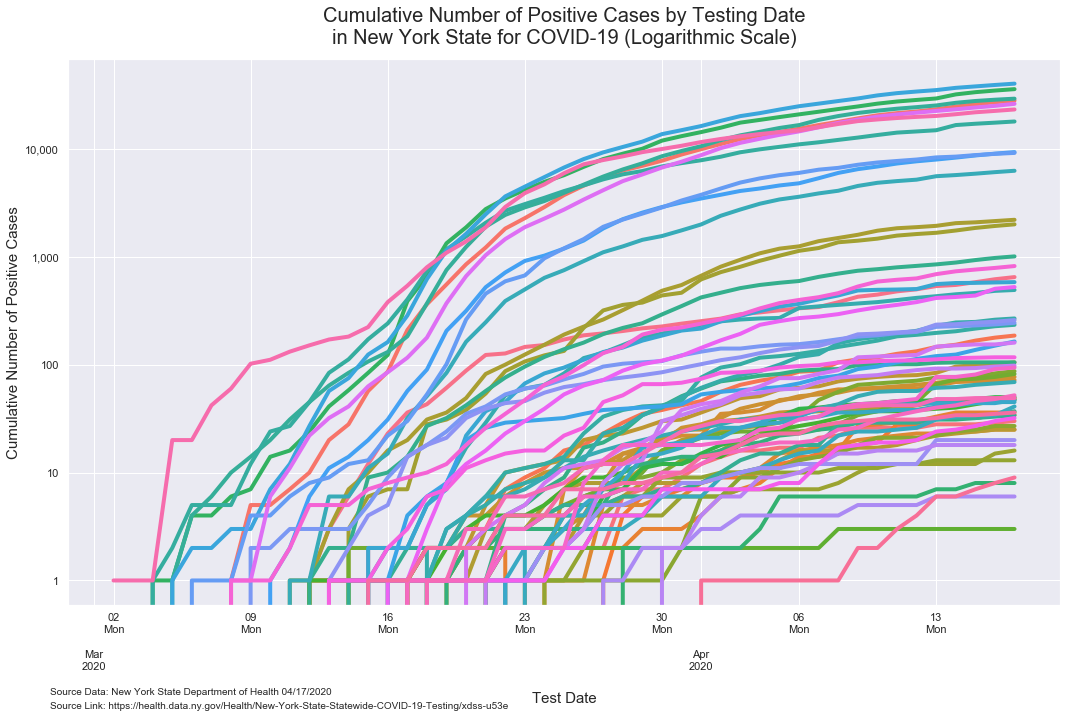

In [32]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-log')

In [33]:
drop_duplicates = covid_19_nys_data.sort_values(by="Cumulative Number of Positives", ascending=False).drop_duplicates(
                                                    subset ="County", keep = 'first')
top_10 = drop_duplicates[0:10]
top10_list = list(top_10['County'])
top_10  = covid_19_nys_data.loc[covid_19_nys_data['County'].isin(top10_list)]

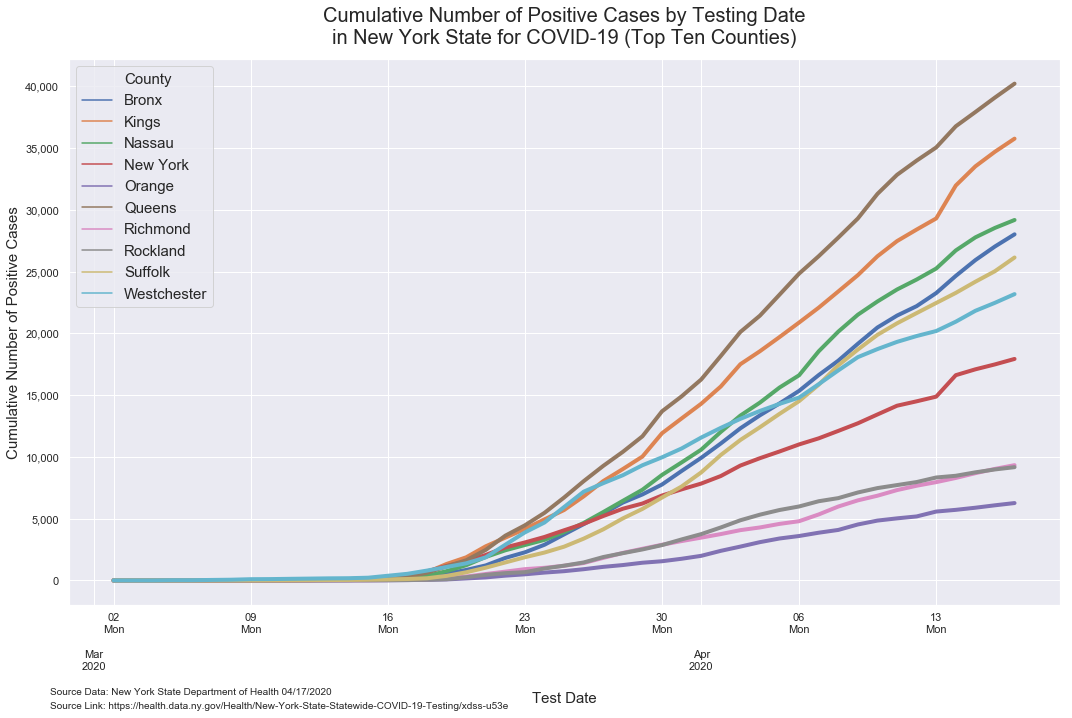

In [34]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=top_10, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10')

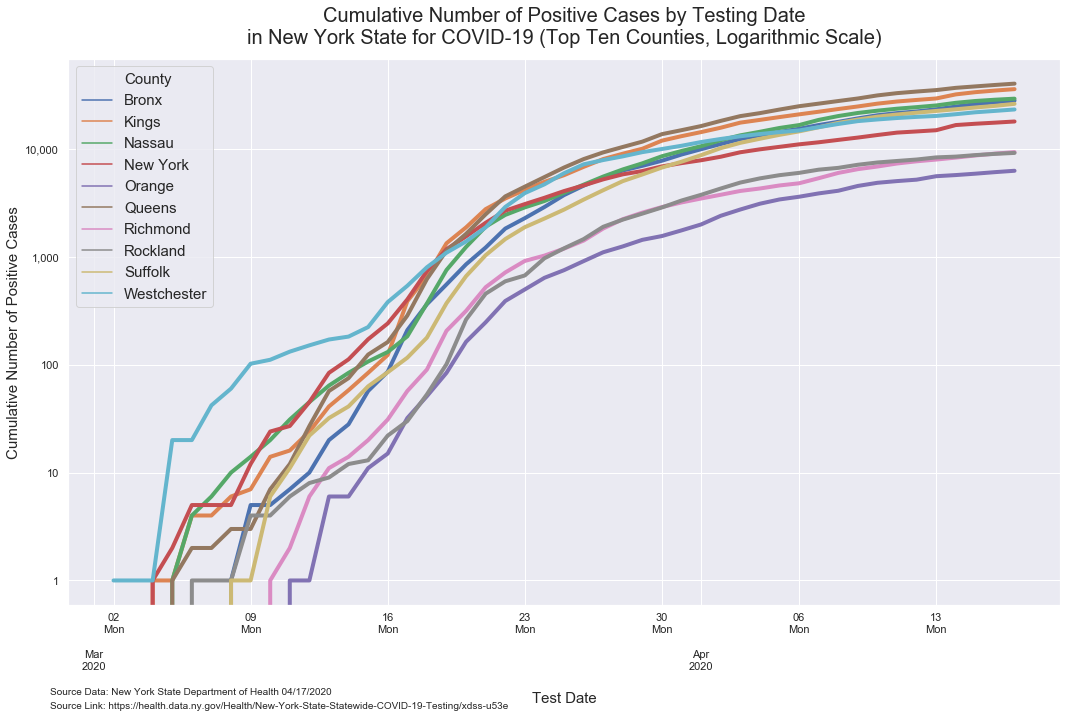

In [35]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=top_10, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10-log')

In [36]:
from_ten_cases = covid_19_nys_data.loc[covid_19_nys_data['Cumulative Number of Positives'] >= 10]

In [37]:
from_ten_cases = from_ten_cases.sort_values(by=['Test Date', 'Cumulative Number of Positives'], ascending=[True, True], ).drop_duplicates(subset ="County", keep = 'first').reset_index(drop=True)

In [38]:
from_ten_cases = from_ten_cases[['County', 'Test Date']]
from_ten_cases.rename(columns={'Test Date': 'ten_cases_date'}, inplace=True)

In [39]:
from_ten_cases

County ten_cases_date
0    Westchester     2020-03-05
1         Nassau     2020-03-08
2       New York     2020-03-09
3          Kings     2020-03-10
4        Suffolk     2020-03-11
5         Queens     2020-03-11
6          Bronx     2020-03-12
7       Richmond     2020-03-13
8       Rockland     2020-03-14
9       Dutchess     2020-03-15
10        Orange     2020-03-15
11        Albany     2020-03-15
12        Monroe     2020-03-16
13      Saratoga     2020-03-17
14   Schenectady     2020-03-17
15        Ulster     2020-03-18
16          Erie     2020-03-18
17      Tompkins     2020-03-20
18      Sullivan     2020-03-20
19      Onondaga     2020-03-20
20    Rensselaer     2020-03-20
21        Putnam     2020-03-20
22      Columbia     2020-03-22
23       Niagara     2020-03-22
24       Clinton     2020-03-24
25        Broome     2020-03-24
26       Ontario     2020-03-25
27       Steuben     2020-03-25
28        Oneida     2020-03-25
29       Chemung     2020-03-26
30         Wayne     2020-03-26
31       Madison     2020-03-26
32        Warren     2020-03-27
33      Herkimer     2020-03-28
34    Livingston     2020-03-28
35        Otsego     2020-03-28
36  St. Lawrence     2020-03-28
37      Chenango     2020-03-28
38        Greene     2020-03-29
39      Delaware     2020-03-29
40     Jefferson     2020-03-29
41        Oswego     2020-03-29
42       Genesee     2020-03-30
43    Washington     2020-03-30
44       Wyoming     2020-03-31
45      Allegany     2020-04-01
46      Cortland     2020-04-02
47      Franklin     2020-04-02
48    Montgomery     2020-04-02
49    Chautauqua     2020-04-03
50       Orleans     2020-04-03
51     Schoharie     2020-04-03
52   Cattaraugus     2020-04-04
53        Cayuga     2020-04-05
54        Fulton     2020-04-05
55        Seneca     2020-04-06
56         Tioga     2020-04-07
57         Essex     2020-04-09

In [40]:
from_ten_cases = covid_19_nys_data.merge(from_ten_cases, left_on='County', right_on='County')

In [41]:
from_ten_cases = from_ten_cases.loc[from_ten_cases['Cumulative Number of Positives'] >= 10]

In [42]:
from_ten_cases

Test Date   County  New Positives  Cumulative Number of Positives  \
0    2020-04-17   Albany             29                             648   
1    2020-04-16   Albany             38                             619   
2    2020-04-15   Albany             33                             581   
3    2020-04-14   Albany             13                             548   
4    2020-04-13   Albany             36                             535   
...         ...      ...            ...                             ...   
2692 2020-04-04  Wyoming              4                              22   
2693 2020-04-03  Wyoming              3                              18   
2694 2020-04-02  Wyoming              1                              15   
2695 2020-04-01  Wyoming              4                              14   
2696 2020-03-31  Wyoming              1                              10   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
0                                 291                                  6727   
1                                 273                                  6436   
2                                 301                                  6163   
3                                 106                                  5862   
4                                 216                                  5756   
...                               ...                                   ...   
2692                               16                                   175   
2693                               11                                   159   
2694                               11                                   148   
2695                               12                                   137   
2696                               10                                   125   

     ten_cases_date  
0        2020-03-15  
1        2020-03-15  
2        2020-03-15  
3        2020-03-15  
4        2020-03-15  
...             ...  
2692     2020-03-31  
2693     2020-03-31  
2694     2020-03-31  
2695     2020-03-31  
2696     2020-03-31  

[1444 rows x 7 columns]

In [43]:
from_ten_cases['days_from_10_cases'] = (from_ten_cases['Test Date'] - 
                                       from_ten_cases['ten_cases_date']).dt.days

In [44]:
from_ten_cases

Test Date   County  New Positives  Cumulative Number of Positives  \
0    2020-04-17   Albany             29                             648   
1    2020-04-16   Albany             38                             619   
2    2020-04-15   Albany             33                             581   
3    2020-04-14   Albany             13                             548   
4    2020-04-13   Albany             36                             535   
...         ...      ...            ...                             ...   
2692 2020-04-04  Wyoming              4                              22   
2693 2020-04-03  Wyoming              3                              18   
2694 2020-04-02  Wyoming              1                              15   
2695 2020-04-01  Wyoming              4                              14   
2696 2020-03-31  Wyoming              1                              10   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
0                                 291                                  6727   
1                                 273                                  6436   
2                                 301                                  6163   
3                                 106                                  5862   
4                                 216                                  5756   
...                               ...                                   ...   
2692                               16                                   175   
2693                               11                                   159   
2694                               11                                   148   
2695                               12                                   137   
2696                               10                                   125   

     ten_cases_date  days_from_10_cases  
0        2020-03-15                  33  
1        2020-03-15                  32  
2        2020-03-15                  31  
3        2020-03-15                  30  
4        2020-03-15                  29  
...             ...                 ...  
2692     2020-03-31                   4  
2693     2020-03-31                   3  
2694     2020-03-31                   2  
2695     2020-03-31                   1  
2696     2020-03-31                   0  

[1444 rows x 8 columns]

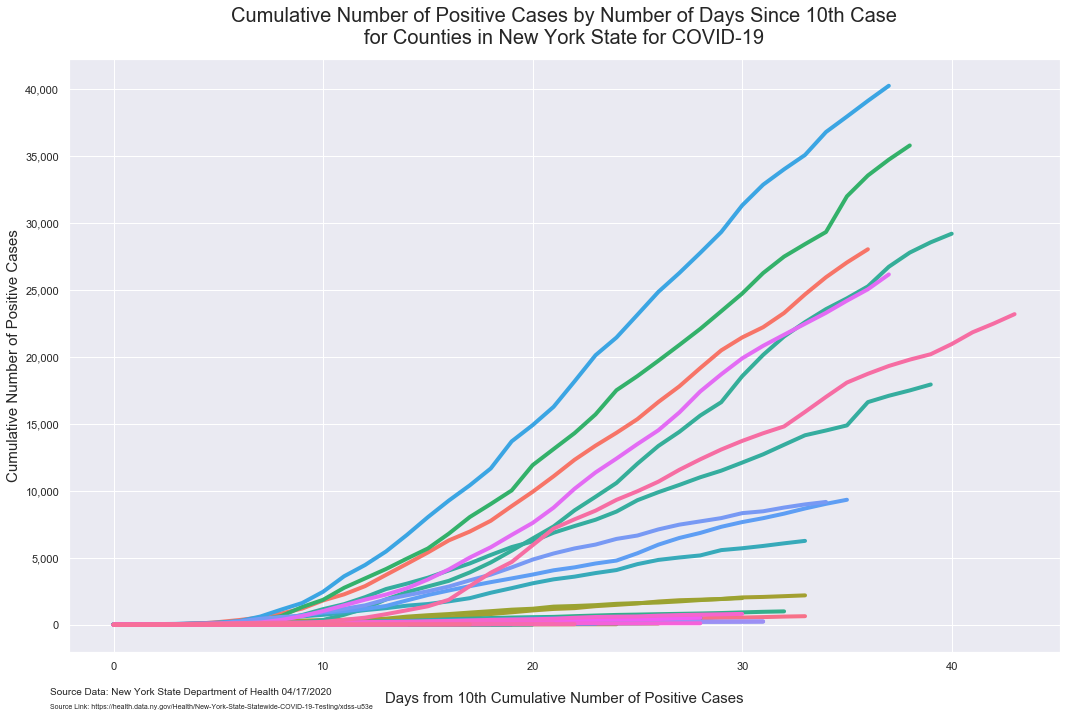

In [45]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county')

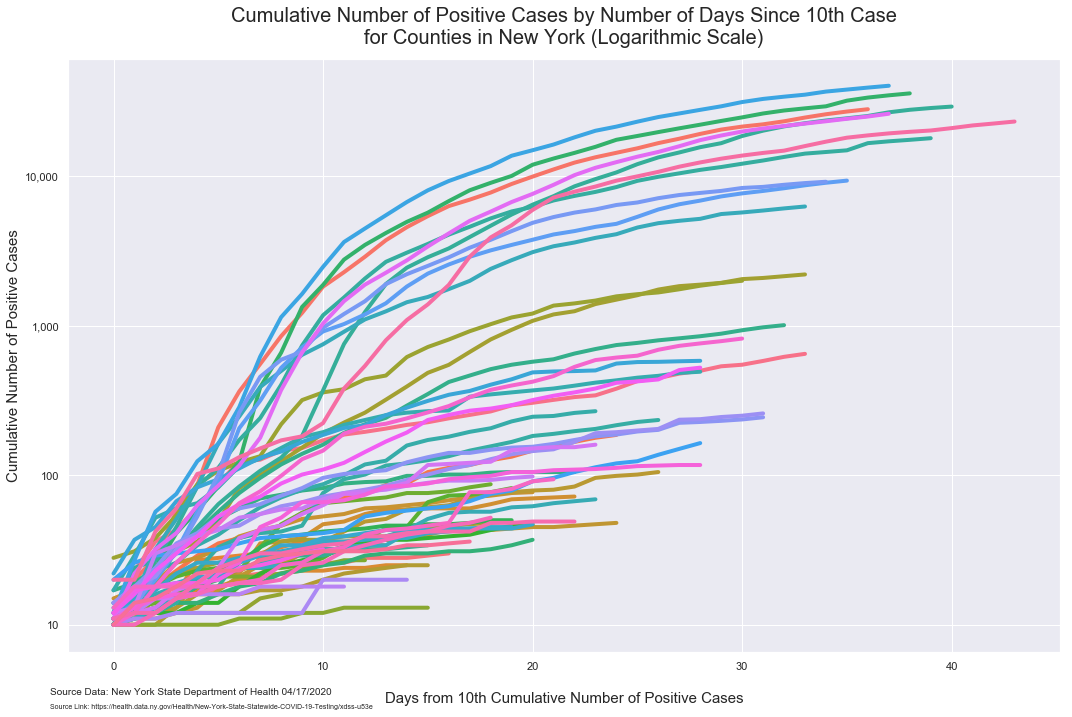

In [46]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-log')

In [47]:
top10_list = list(top_10['County'])

from_ten_cases_top_10  = from_ten_cases.loc[from_ten_cases['County'].isin(top10_list)]

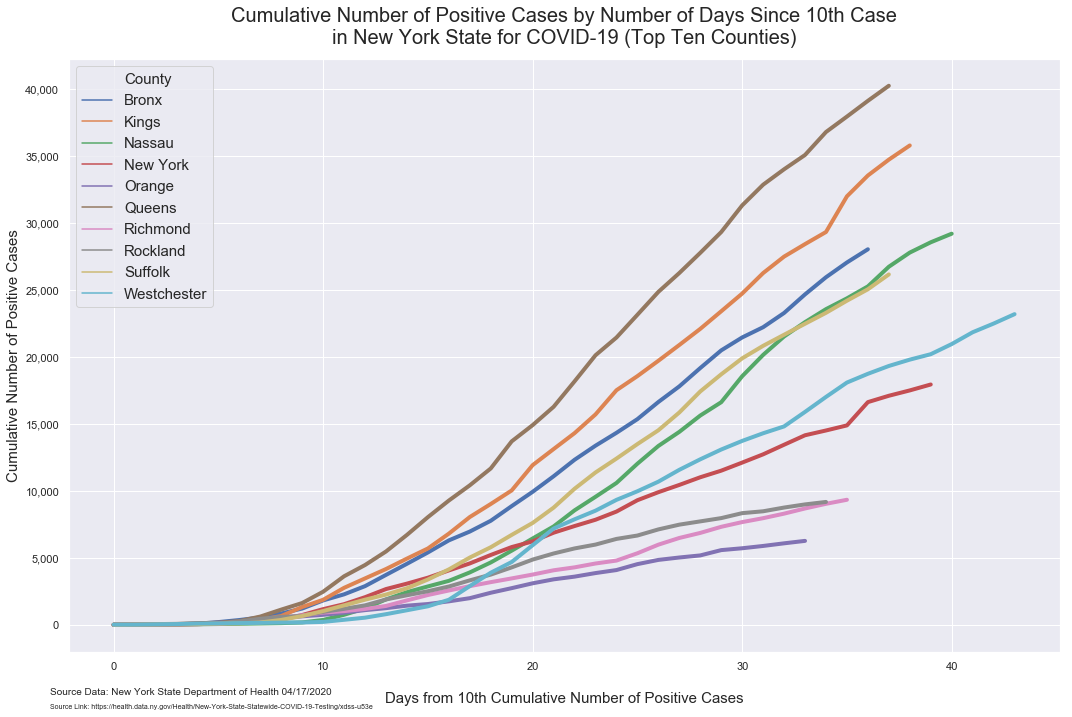

In [48]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10')

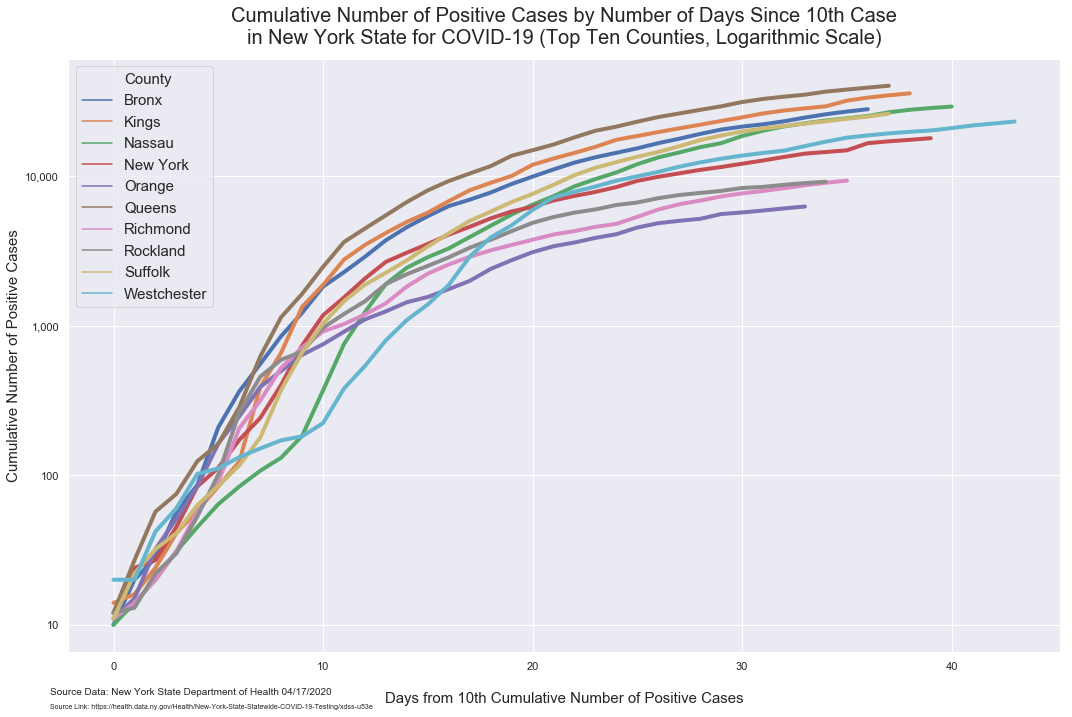

In [49]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-log')

In [50]:
from_ten_cases_top_10.head()

Test Date County  New Positives  Cumulative Number of Positives  \
94 2020-04-17  Bronx            984                           28019   
95 2020-04-16  Bronx           1103                           27035   
96 2020-04-15  Bronx           1279                           25932   
97 2020-04-14  Bronx           1387                           24653   
98 2020-04-13  Bronx           1061                           23266   

    Total Number of Tests Performed  Cumulative Number of Tests Performed  \
94                             2597                                 56443   
95                             2793                                 53846   
96                             2939                                 51053   
97                             2622                                 48114   
98                             2294                                 45492   

   ten_cases_date  days_from_10_cases  
94     2020-03-12                  36  
95     2020-03-12                  35  
96     2020-03-12                  34  
97     2020-03-12                  33  
98     2020-03-12                  32

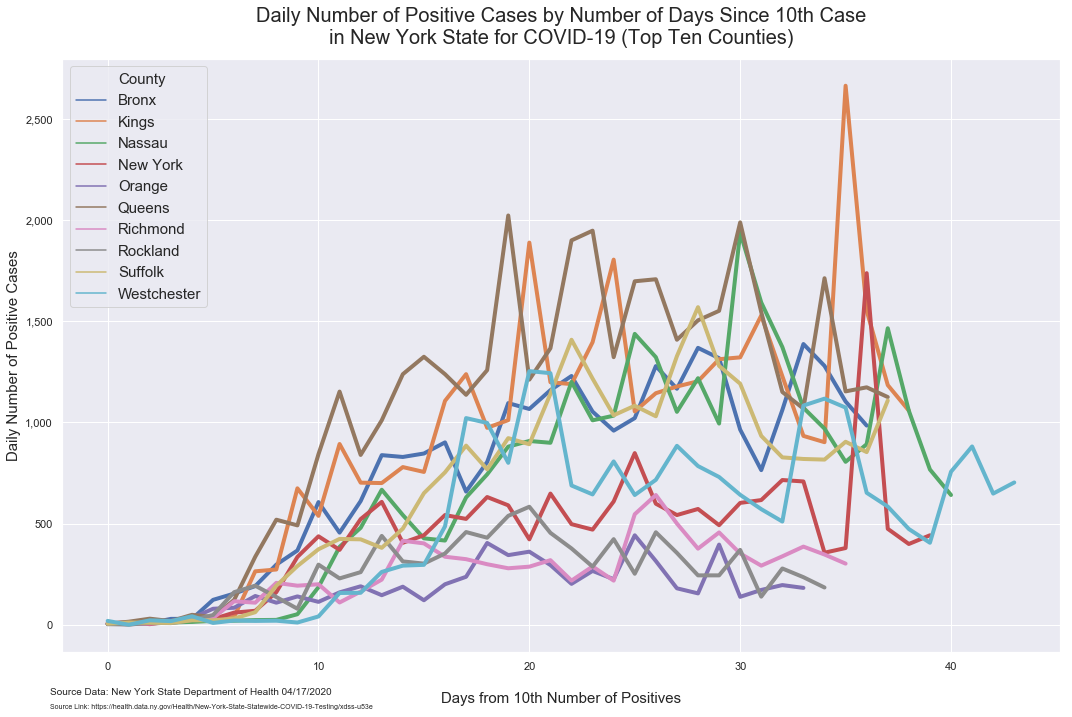

In [51]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positive Cases', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily')

In [52]:
from_ten_cases_top_10['New Positives'].loc[from_ten_cases_top_10['New Positives'] <= 0]

2674    0
Name: New Positives, dtype: int64

In [53]:
temp_fill_zeros = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                                 ascending=[True, True, True])

temp_fill_zeros['New Positives'].loc[from_ten_cases_top_10['New Positives'] <= 0] = 1

temp_fill_zeros

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Test Date       County  New Positives  Cumulative Number of Positives  \
130  2020-03-12        Bronx              3                              10   
129  2020-03-13        Bronx             10                              20   
128  2020-03-14        Bronx              8                              28   
127  2020-03-15        Bronx             29                              57   
126  2020-03-16        Bronx             29                              86   
...         ...          ...            ...                             ...   
2636 2020-04-13  Westchester            405                           20191   
2635 2020-04-14  Westchester            756                           20947   
2634 2020-04-15  Westchester            881                           21828   
2633 2020-04-16  Westchester            648                           22476   
2632 2020-04-17  Westchester            703                           23179   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
130                                36                                   190   
129                                99                                   289   
128                                80                                   369   
127                               116                                   485   
126                               151                                   636   
...                               ...                                   ...   
2636                             1145                                 60607   
2635                             2019                                 62626   
2634                             2642                                 65268   
2633                             2042                                 67310   
2632                             2298                                 69608   

     ten_cases_date  days_from_10_cases  
130      2020-03-12                   0  
129      2020-03-12                   1  
128      2020-03-12                   2  
127      2020-03-12                   3  
126      2020-03-12                   4  
...             ...                 ...  
2636     2020-03-05                  39  
2635     2020-03-05                  40  
2634     2020-03-05                  41  
2633     2020-03-05                  42  
2632     2020-03-05                  43  

[382 rows x 8 columns]

In [54]:
temp_fill_zeros[['County', 'New Positives', 'days_from_10_cases']].loc[from_ten_cases_top_10['County'] == 'Westchester']

County  New Positives  days_from_10_cases
2675  Westchester             19                   0
2674  Westchester              1                   1
2673  Westchester             22                   2
2672  Westchester             18                   3
2671  Westchester             42                   4
2670  Westchester              9                   5
2669  Westchester             21                   6
2668  Westchester             19                   7
2667  Westchester             20                   8
2666  Westchester             11                   9
2665  Westchester             41                  10
2664  Westchester            157                  11
2663  Westchester            158                  12
2662  Westchester            261                  13
2661  Westchester            292                  14
2660  Westchester            296                  15
2659  Westchester            486                  16
2658  Westchester           1021                  17
2657  Westchester            997                  18
2656  Westchester            800                  19
2655  Westchester           1253                  20
2654  Westchester           1243                  21
2653  Westchester            688                  22
2652  Westchester            644                  23
2651  Westchester            807                  24
2650  Westchester            641                  25
2649  Westchester            716                  26
2648  Westchester            884                  27
2647  Westchester            784                  28
2646  Westchester            730                  29
2645  Westchester            642                  30
2644  Westchester            571                  31
2643  Westchester            510                  32
2642  Westchester           1083                  33
2641  Westchester           1117                  34
2640  Westchester           1073                  35
2639  Westchester            652                  36
2638  Westchester            584                  37
2637  Westchester            473                  38
2636  Westchester            405                  39
2635  Westchester            756                  40
2634  Westchester            881                  41
2633  Westchester            648                  42
2632  Westchester            703                  43

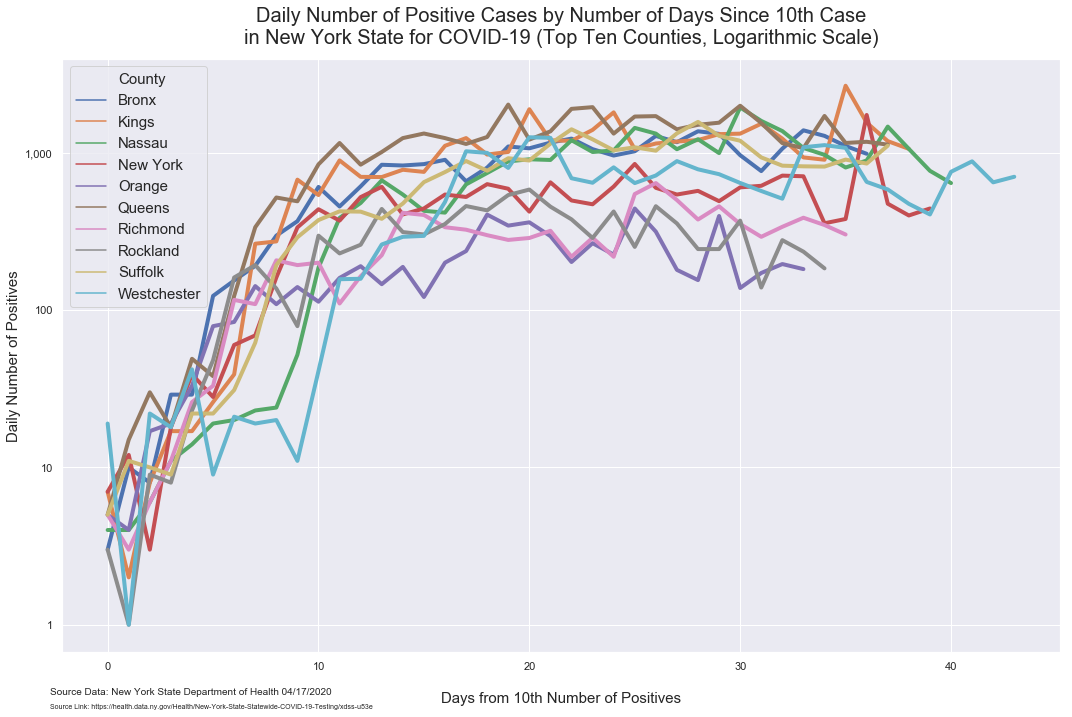

In [55]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=temp_fill_zeros, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily-log')

In [56]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                                                ascending=[True, True, True])

In [57]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10_weekly.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'New Positives': np.mean})

In [58]:
from_ten_cases_top_10_weekly.reset_index(inplace=True)
from_ten_cases_top_10_weekly.rename(columns={'New Positives': 'New Positives Weekly Average'}, inplace=True)

In [59]:
from_ten_cases_top_10_weekly

County  Test Date  days_from_10_cases  New Positives Weekly Average
0         Bronx 2020-03-15                   3                     12.500000
1         Bronx 2020-03-22                  10                    252.428571
2         Bronx 2020-03-29                  17                    734.000000
3         Bronx 2020-04-05                  24                   1052.142857
4         Bronx 2020-04-12                  31                   1125.428571
..          ...        ...                 ...                           ...
57  Westchester 2020-03-22                  17                    381.571429
58  Westchester 2020-03-29                  24                    918.857143
59  Westchester 2020-04-05                  31                    709.714286
60  Westchester 2020-04-12                  38                    784.571429
61  Westchester 2020-04-19                  43                    678.600000

[62 rows x 4 columns]

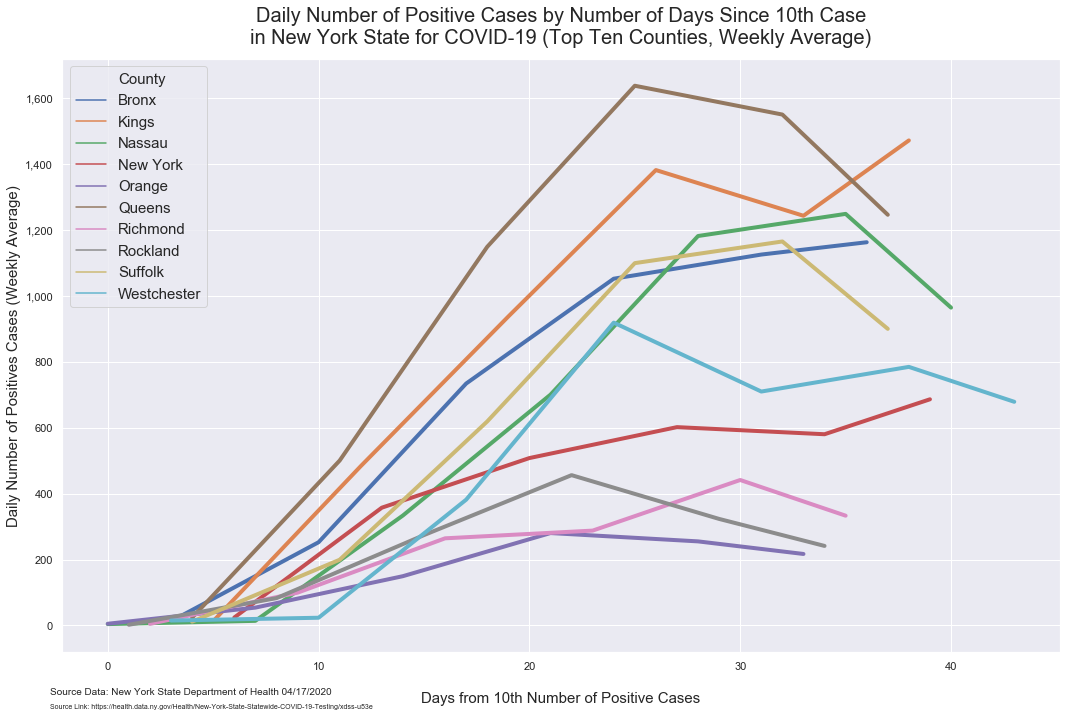

In [60]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Positives Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly')

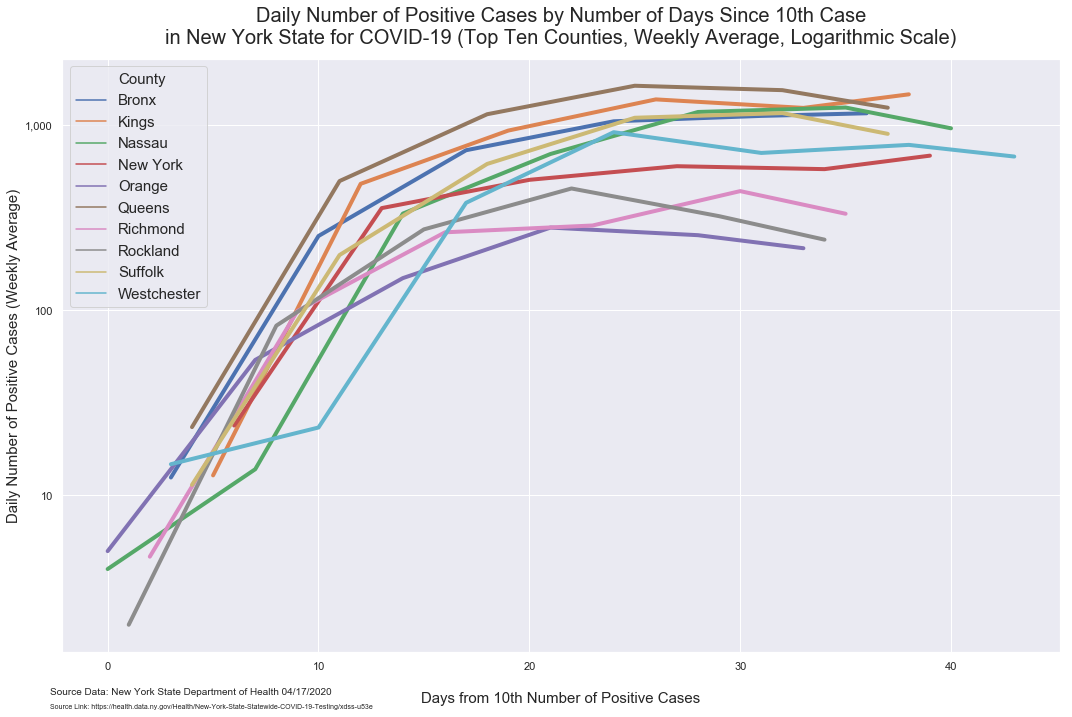

In [61]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Positive Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly-log')

# Trajectory Plots

In [62]:
covid_19_nys_data.head()

Test Date       County  New Positives  Cumulative Number of Positives  \
0 2020-04-17       Albany             29                             648   
1 2020-04-17     Allegany              1                              30   
2 2020-04-17        Bronx            984                           28019   
3 2020-04-17       Broome              8                             186   
4 2020-04-17  Cattaraugus              0                              34   

   Total Number of Tests Performed  Cumulative Number of Tests Performed  
0                              291                                  6727  
1                               15                                   348  
2                             2597                                 56443  
3                               64                                  1331  
4                               15                                   454

In [63]:
nys_trajectory = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

nys_trajectory.set_index('Test Date', drop=False, inplace=True)

nys_trajectory.index = pd.to_datetime(nys_trajectory.index, infer_datetime_format=True)

In [64]:
nys_trajectory['daily_cases'] = nys_trajectory['Cumulative Number of Positives'].diff()

In [65]:
nys_trajectory.head()

Test Date  Cumulative Number of Positives  daily_cases
Test Date                                                         
2020-03-02 2020-03-02                               1          NaN
2020-03-03 2020-03-03                               1          0.0
2020-03-04 2020-03-04                               3          2.0
2020-03-05 2020-03-05                              25         22.0
2020-03-06 2020-03-06                              36         11.0

In [66]:
nys_trajectory['daily_cases'].loc[nys_trajectory.daily_cases < 0] = nys_trajectory['Cumulative Number of Positives']

nys_trajectory['daily_cases'].loc[nys_trajectory.daily_cases.isnull()] = nys_trajectory['Cumulative Number of Positives']

In [67]:
nys_trajectory.head()

Test Date  Cumulative Number of Positives  daily_cases
Test Date                                                         
2020-03-02 2020-03-02                               1          1.0
2020-03-03 2020-03-03                               1          0.0
2020-03-04 2020-03-04                               3          2.0
2020-03-05 2020-03-05                              25         22.0
2020-03-06 2020-03-06                              36         11.0

In [68]:
nys_trajectory = nys_trajectory.set_index('Test Date').resample('W').agg({'Cumulative Number of Positives': 
                                                                    np.max, 'daily_cases': np.mean})

In [69]:
nys_trajectory.reset_index(inplace=True)
nys_trajectory.rename(columns={'daily_cases': 'daily_cases_week_avg'}, inplace=True)

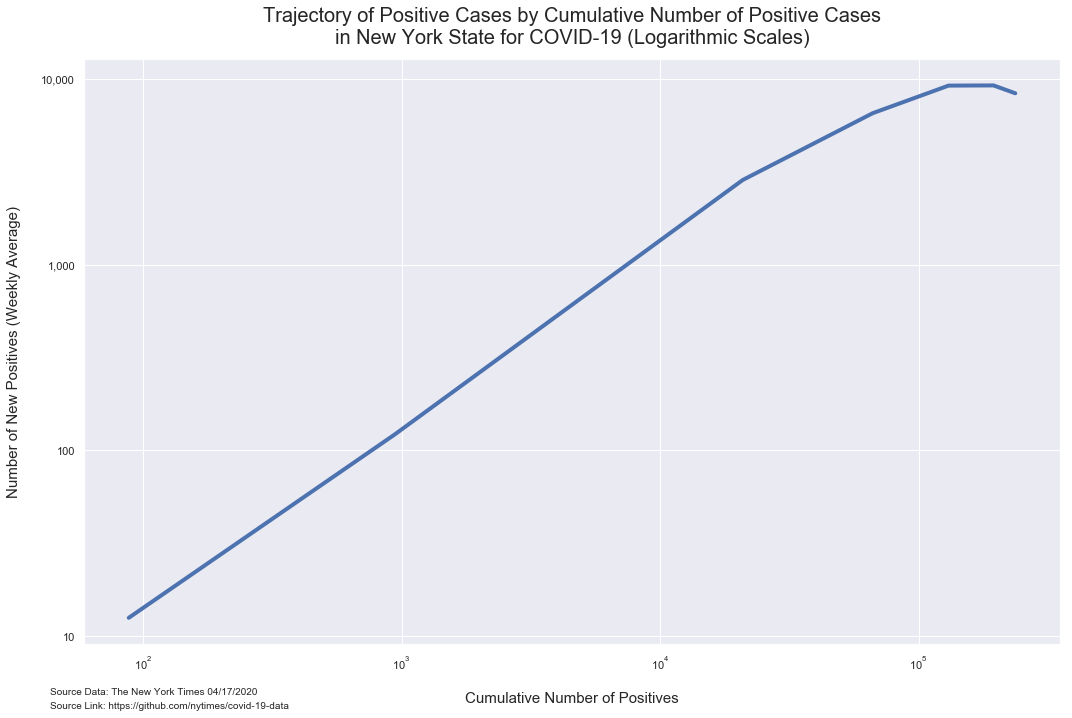

In [70]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", data=nys_trajectory, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nin New York State for COVID-19 (Logarithmic Scales)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-log-log')

In [71]:
trajectory_plot = covid_19_nys_data.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                ascending=[True, True, True])

In [72]:
trajectory_plot.head()

Test Date  County  New Positives  Cumulative Number of Positives  \
2852 2020-03-02  Albany              0                               0   
2790 2020-03-03  Albany              0                               0   
2728 2020-03-04  Albany              0                               0   
2666 2020-03-05  Albany              0                               0   
2604 2020-03-06  Albany              0                               0   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  
2852                                0                                     0  
2790                                0                                     0  
2728                                0                                     0  
2666                                3                                     3  
2604                                0                                     3

In [73]:
trajectory_plot = trajectory_plot.loc[trajectory_plot['Cumulative Number of Positives'] > 0]

In [74]:
trajectory_plot = trajectory_plot.set_index('Test Date').groupby('County').resample('W').agg({'Cumulative Number of Positives': np.max, 
                                                                                                     'New Positives': np.mean})


In [75]:
trajectory_plot[:50]

Cumulative Number of Positives  New Positives
County      Test Date                                                
Albany      2020-03-15                              12       3.000000
            2020-03-22                             127      16.428571
            2020-03-29                             217      12.857143
            2020-04-05                             319      14.571429
            2020-04-12                             499      25.714286
            2020-04-19                             648      29.800000
Allegany    2020-03-15                               2       2.000000
            2020-03-22                               2       0.000000
            2020-03-29                               7       0.714286
            2020-04-05                              17       1.428571
            2020-04-12                              26       1.285714
            2020-04-19                              30       0.800000
Bronx       2020-03-08                               1       1.000000
            2020-03-15                              57       8.000000
            2020-03-22                            1824     252.428571
            2020-03-29                            6962     734.000000
            2020-04-05                           14327    1052.142857
            2020-04-12                           22205    1125.428571
            2020-04-19                           28019    1162.800000
Broome      2020-03-15                               1       0.250000
            2020-03-22                               7       0.857143
            2020-03-29                              35       4.000000
            2020-04-05                              76       5.857143
            2020-04-12                             133       8.142857
            2020-04-19                             186      10.600000
Cattaraugus 2020-03-29                               6       2.000000
            2020-04-05                              12       0.857143
            2020-04-12                              28       2.285714
            2020-04-19                              34       1.200000
Cayuga      2020-03-22                               2       2.000000
            2020-03-29                               3       0.142857
            2020-04-05                              11       1.142857
            2020-04-12                              30       2.714286
            2020-04-19                              36       1.200000
Chautauqua  2020-03-29                               5       0.833333
            2020-04-05                              15       1.428571
            2020-04-12                              23       1.142857
            2020-04-19                              25       0.400000
Chemung     2020-03-29                              15       2.142857
            2020-04-05                              47       4.571429
            2020-04-12                              60       1.857143
            2020-04-19                              72       2.400000
Chenango    2020-03-22                               3       0.500000
            2020-03-29                              17       2.000000
            2020-04-05                              46       4.142857
            2020-04-12                              65       2.714286
            2020-04-19                              77       2.400000
Clinton     2020-03-22                               6       0.857143
            2020-03-29                              17       1.571429
            2020-04-05                              36       2.714286

In [76]:
trajectory_plot.reset_index(inplace=True)

trajectory_plot.rename(columns={'New Positives': 'daily_cases_week_avg'}, inplace=True)

In [77]:
trajectory_plot.head()

County  Test Date  Cumulative Number of Positives  daily_cases_week_avg
0  Albany 2020-03-15                              12              3.000000
1  Albany 2020-03-22                             127             16.428571
2  Albany 2020-03-29                             217             12.857143
3  Albany 2020-04-05                             319             14.571429
4  Albany 2020-04-12                             499             25.714286

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


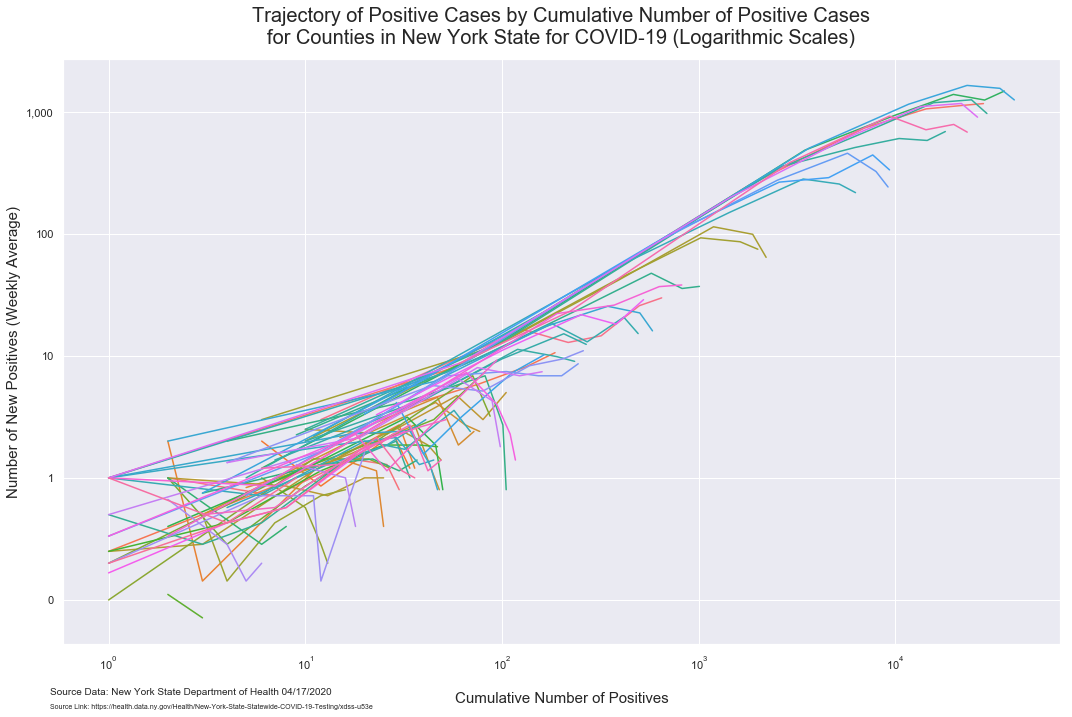

In [78]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot, ci=False)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log')

In [79]:
trajectory_plot_scatter = trajectory_plot.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                              ascending=[False, False]).drop_duplicates(subset ="County", 
                                              keep = 'first').reset_index(drop=True)

In [80]:
trajectory_plot_scatter.tail()

County  Test Date  Cumulative Number of Positives  daily_cases_week_avg
57  Franklin 2020-04-19                              13                   0.2
58     Yates 2020-04-19                               9                   1.0
59     Lewis 2020-04-19                               8                   0.4
60  Schuyler 2020-04-19                               6                   0.2
61  Hamilton 2020-04-19                               3                   0.0

In [81]:
print(list(trajectory_plot_scatter.County))

['Queens', 'Kings', 'Nassau', 'Bronx', 'Suffolk', 'Westchester', 'New York', 'Richmond', 'Rockland', 'Orange', 'Dutchess', 'Erie', 'Monroe', 'Ulster', 'Albany', 'Putnam', 'Sullivan', 'Onondaga', 'Oneida', 'Schenectady', 'Saratoga', 'Niagara', 'Broome', 'Rensselaer', 'Steuben', 'Tompkins', 'Columbia', 'Madison', 'St. Lawrence', 'Warren', 'Genesee', 'Greene', 'Chenango', 'Chemung', 'Ontario', 'Washington', 'Jefferson', 'Delaware', 'Wayne', 'Clinton', 'Herkimer', 'Otsego', 'Oswego', 'Orleans', 'Livingston', 'Cayuga', 'Wyoming', 'Cattaraugus', 'Montgomery', 'Tioga', 'Allegany', 'Fulton', 'Chautauqua', 'Cortland', 'Schoharie', 'Seneca', 'Essex', 'Franklin', 'Yates', 'Lewis', 'Schuyler', 'Hamilton']


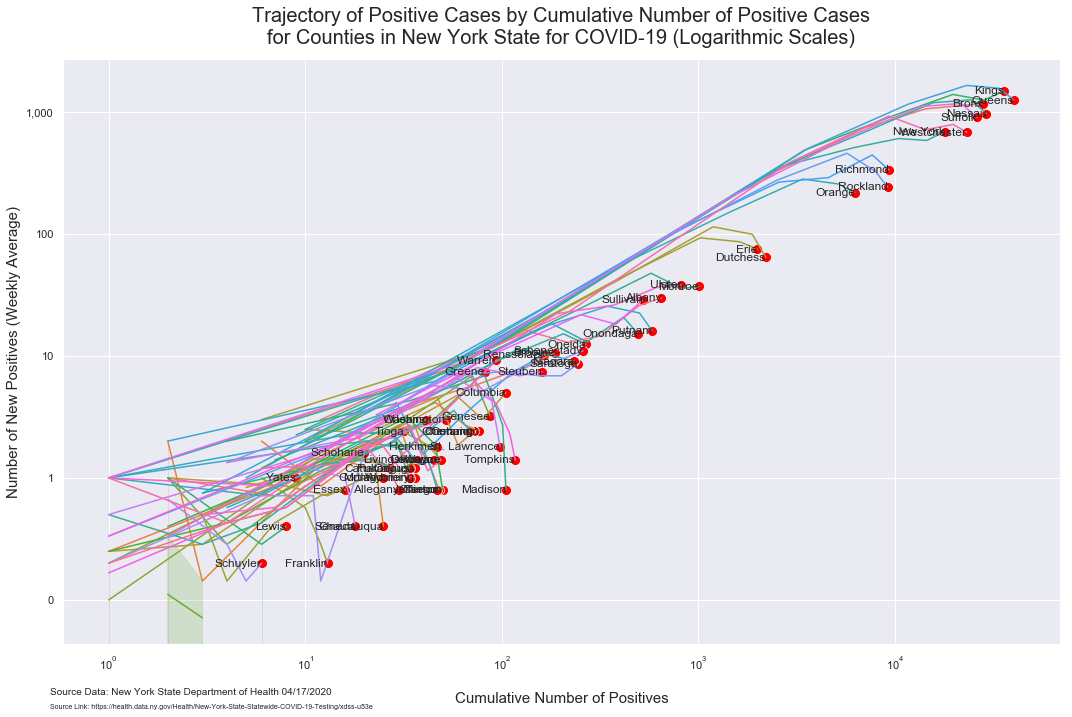

In [82]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.daily_cases_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
#plt.savefig('figures/trajectory-nys-county-log-log-scatter')

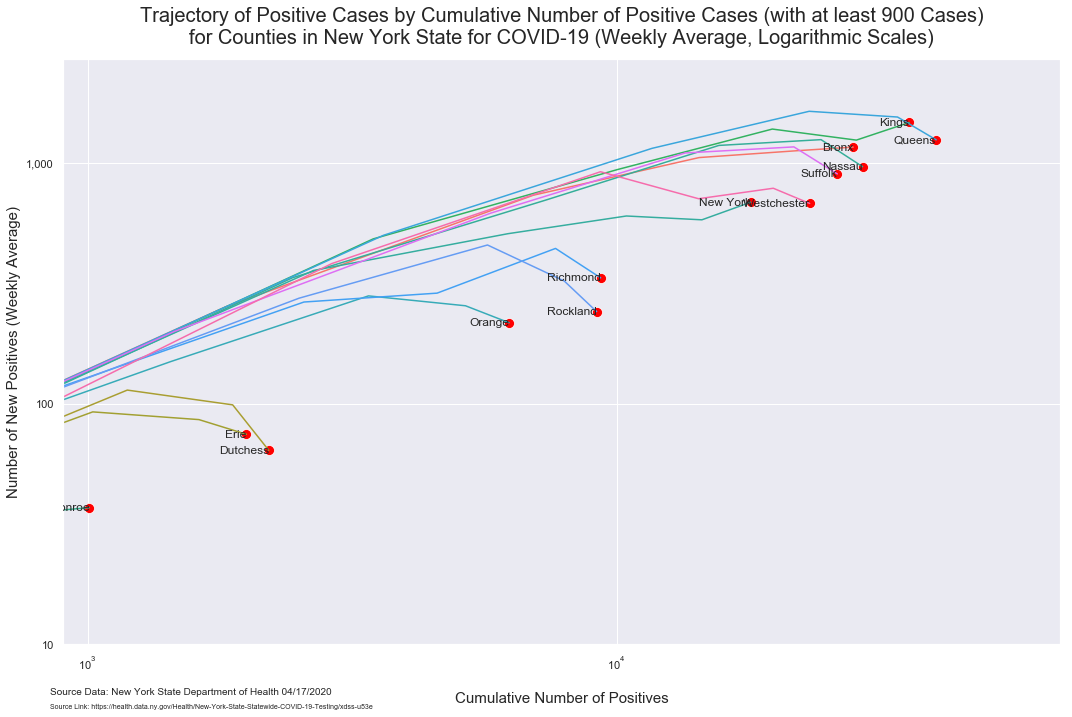

In [83]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.daily_cases_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

plt.xlim(900)
plt.ylim(10)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases (with at least 900 Cases)\nfor Counties in New York State for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log-scatter-x-limit')

In [84]:
top10_list = list(top_10['County'])

trajectory_plot_top_10  = trajectory_plot.loc[trajectory_plot['County'].isin(top10_list)]

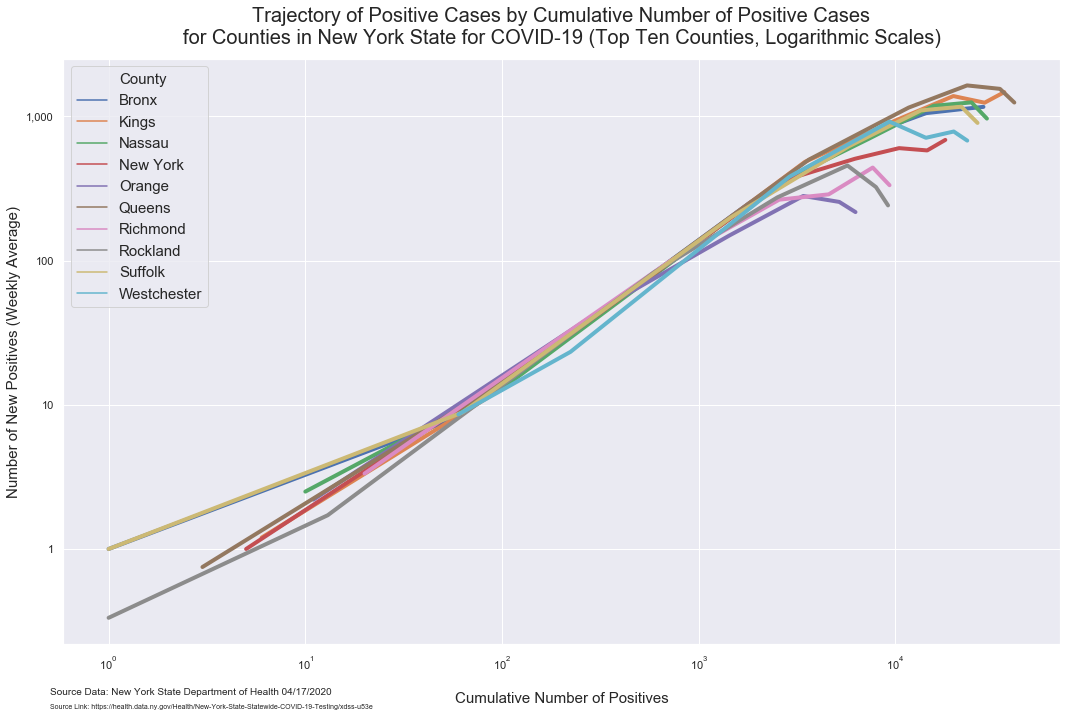

In [85]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot_top_10, linewidth=4)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend(fontsize=15)
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Top Ten Counties, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-top-ten-log-log')

In [86]:
covid_19_nys_data_total = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

covid_19_nys_data_total.set_index('Test Date', drop=False, inplace=True)

covid_19_nys_data_total.index = pd.to_datetime(covid_19_nys_data_total.index, infer_datetime_format=True)

In [87]:
covid_19_nys_data_total.head(10)

Test Date  Cumulative Number of Positives
Test Date                                            
2020-03-02 2020-03-02                               1
2020-03-03 2020-03-03                               1
2020-03-04 2020-03-04                               3
2020-03-05 2020-03-05                              25
2020-03-06 2020-03-06                              36
2020-03-07 2020-03-07                              60
2020-03-08 2020-03-08                              88
2020-03-09 2020-03-09                             151
2020-03-10 2020-03-10                             195
2020-03-11 2020-03-11                             251

In [88]:
covid_19_nys_data_total.tail(10)

Test Date  Cumulative Number of Positives
Test Date                                            
2020-04-08 2020-04-08                          159937
2020-04-09 2020-04-09                          170512
2020-04-10 2020-04-10                          180458
2020-04-11 2020-04-11                          188694
2020-04-12 2020-04-12                          195031
2020-04-13 2020-04-13                          202208
2020-04-14 2020-04-14                          213779
2020-04-15 2020-04-15                          222284
2020-04-16 2020-04-16                          229642
2020-04-17 2020-04-17                          236732

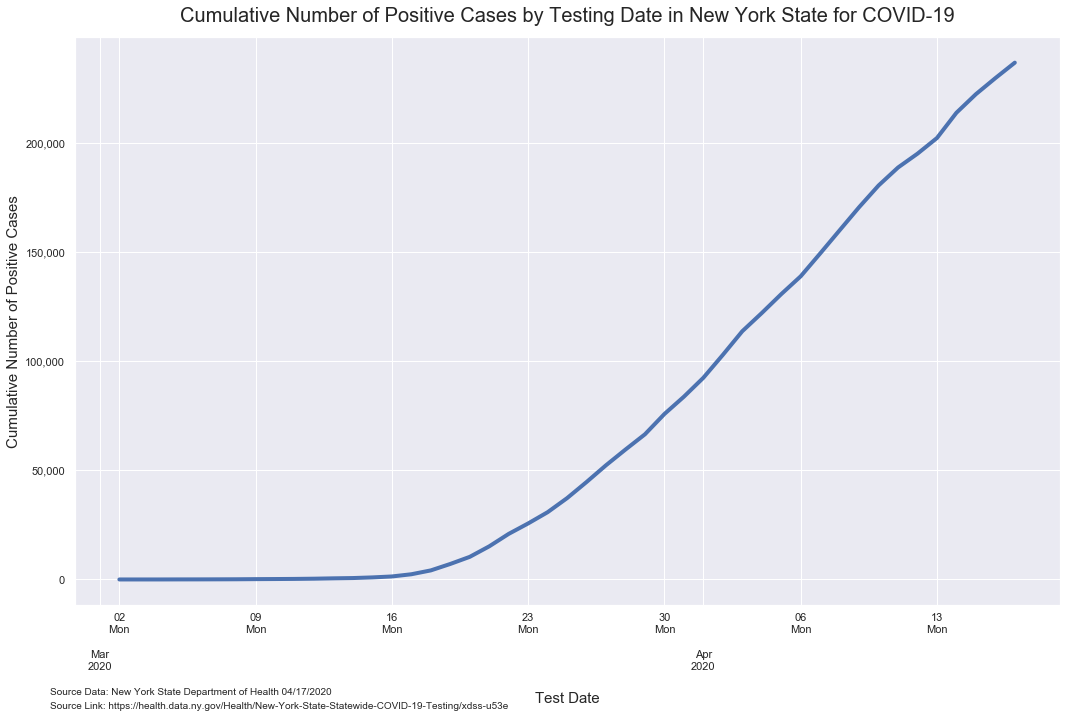

In [89]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys')

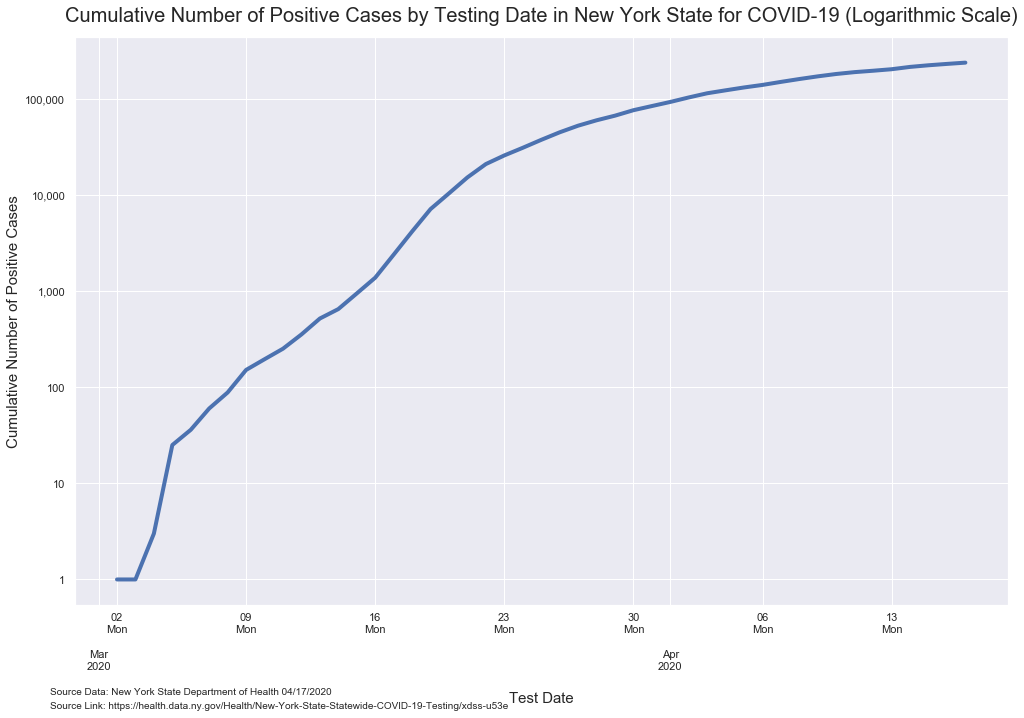

In [90]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys-log')

# Bar Plots

In [91]:
bar_plot = covid_19_nys_data.sort_values(by = 'Test Date', 
                    ascending=False).drop_duplicates(
                    subset ="County", keep = 'first')

In [92]:
bar_plot = bar_plot.sort_values(by = 'Cumulative Number of Positives', ascending=True)

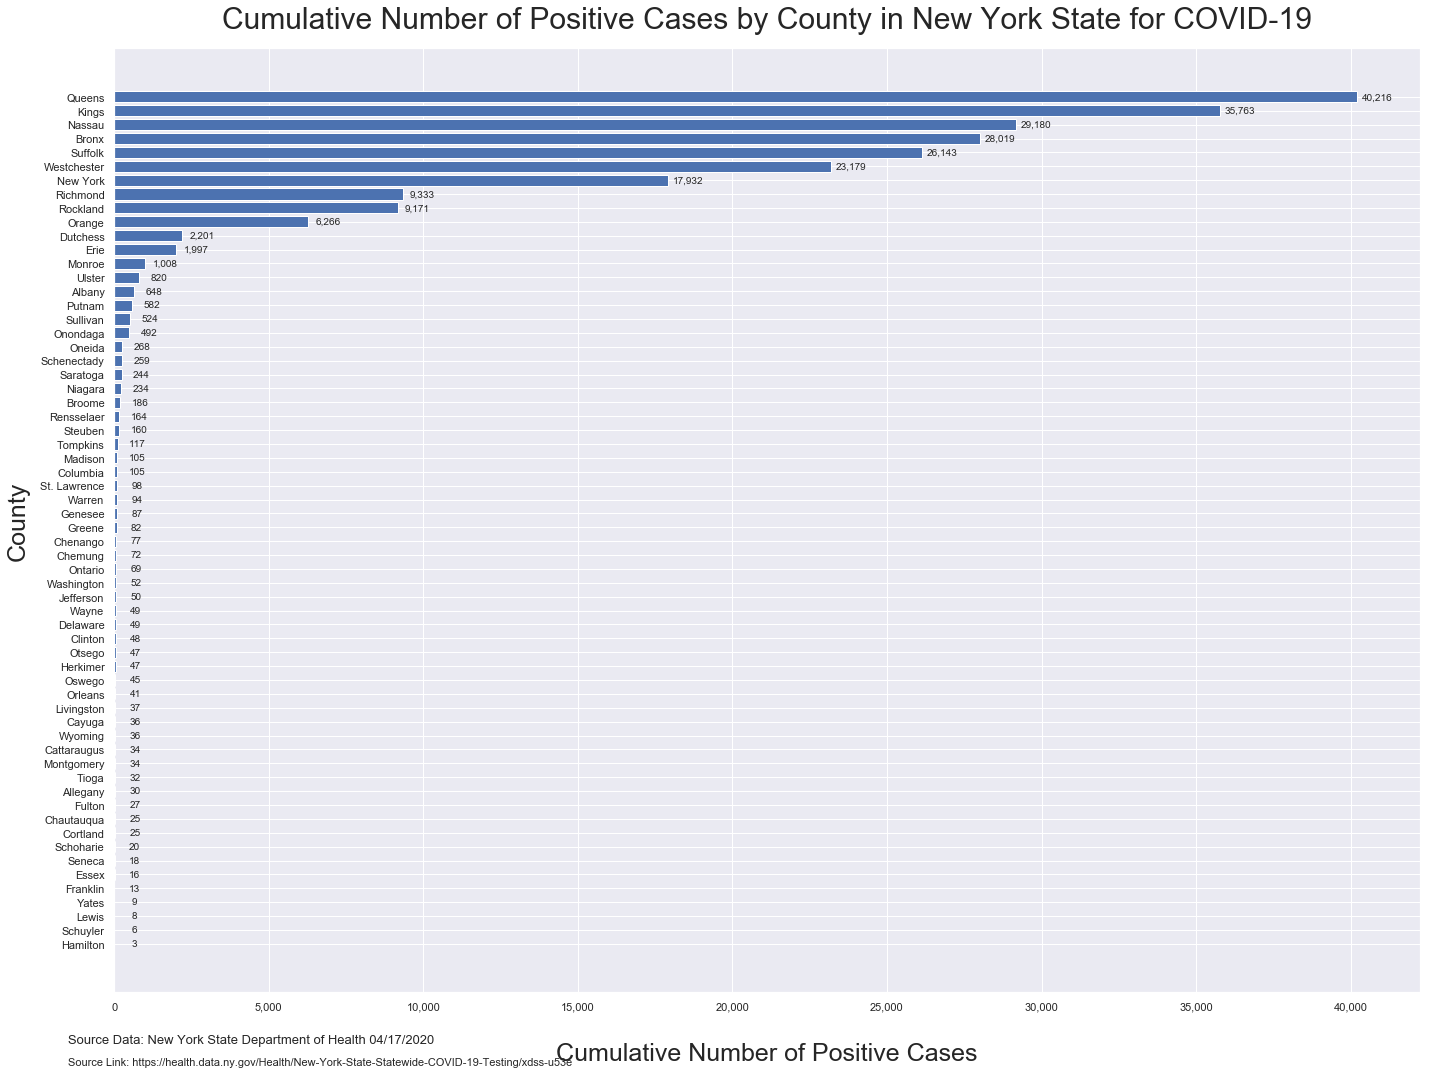

In [93]:
plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar_plot.County, bar_plot['Cumulative Number of Positives'])
plt.xlabel("Cumulative Number of Positive Cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("County", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=11)

plt.title("Cumulative Number of Positive Cases by County in New York State for COVID-19", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/cases-by-county-barh')

In [94]:
from_ten_cases_top_10

Test Date       County  New Positives  Cumulative Number of Positives  \
94   2020-04-17        Bronx            984                           28019   
95   2020-04-16        Bronx           1103                           27035   
96   2020-04-15        Bronx           1279                           25932   
97   2020-04-14        Bronx           1387                           24653   
98   2020-04-13        Bronx           1061                           23266   
...         ...          ...            ...                             ...   
2671 2020-03-09  Westchester             42                             102   
2672 2020-03-08  Westchester             18                              60   
2673 2020-03-07  Westchester             22                              42   
2674 2020-03-06  Westchester              0                              20   
2675 2020-03-05  Westchester             19                              20   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
94                               2597                                 56443   
95                               2793                                 53846   
96                               2939                                 51053   
97                               2622                                 48114   
98                               2294                                 45492   
...                               ...                                   ...   
2671                              222                                   592   
2672                              207                                   370   
2673                              110                                   163   
2674                                9                                    53   
2675                               42                                    44   

     ten_cases_date  days_from_10_cases  
94       2020-03-12                  36  
95       2020-03-12                  35  
96       2020-03-12                  34  
97       2020-03-12                  33  
98       2020-03-12                  32  
...             ...                 ...  
2671     2020-03-05                   4  
2672     2020-03-05                   3  
2673     2020-03-05                   2  
2674     2020-03-05                   1  
2675     2020-03-05                   0  

[382 rows x 8 columns]

In [95]:
growth_rate = from_ten_cases_top_10.sort_values(by=['County', 'Test Date', 'Cumulative Number of Positives'], 
                                                ascending=[True, True, True])

In [96]:
growth_rate['growth_rate'] = (growth_rate['New Positives'] / growth_rate['New Positives'].shift(1))

In [97]:
growth_rate.head()

Test Date County  New Positives  Cumulative Number of Positives  \
130 2020-03-12  Bronx              3                              10   
129 2020-03-13  Bronx             10                              20   
128 2020-03-14  Bronx              8                              28   
127 2020-03-15  Bronx             29                              57   
126 2020-03-16  Bronx             29                              86   

     Total Number of Tests Performed  Cumulative Number of Tests Performed  \
130                               36                                   190   
129                               99                                   289   
128                               80                                   369   
127                              116                                   485   
126                              151                                   636   

    ten_cases_date  days_from_10_cases  growth_rate  
130     2020-03-12                   0          NaN  
129     2020-03-12                   1     3.333333  
128     2020-03-12                   2     0.800000  
127     2020-03-12                   3     3.625000  
126     2020-03-12                   4     1.000000

In [98]:
growth_rate = growth_rate.loc[growth_rate.days_from_10_cases != 0]

In [99]:
growth_rate.sort_values(by='growth_rate')

Test Date       County  New Positives  Cumulative Number of Positives  \
2674 2020-03-06  Westchester              0                              20   
2670 2020-03-10  Westchester              9                             111   
1353 2020-03-11     New York              3                              27   
1318 2020-04-15     New York            474                           17091   
1071 2020-03-11        Kings              2                              16   
...         ...          ...            ...                             ...   
1319 2020-04-14     New York           1737                           16617   
1352 2020-03-12     New York             18                              45   
1065 2020-03-17        Kings            264                             387   
1959 2020-03-16     Rockland              9                              22   
2673 2020-03-07  Westchester             22                              42   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
2674                                9                                    53   
2670                              177                                   769   
1353                               70                                   280   
1318                             1533                                 42050   
1071                               24                                   128   
...                               ...                                   ...   
1319                             4068                                 40517   
1352                              186                                   466   
1065                              741                                  1500   
1959                               39                                   122   
2673                              110                                   163   

     ten_cases_date  days_from_10_cases  growth_rate  
2674     2020-03-05                   1     0.000000  
2670     2020-03-05                   5     0.214286  
1353     2020-03-09                   2     0.250000  
1318     2020-03-09                  37     0.272884  
1071     2020-03-10                   1     0.285714  
...             ...                 ...          ...  
1319     2020-03-09                  36     4.583113  
1352     2020-03-09                   3     6.000000  
1065     2020-03-10                   7     6.769231  
1959     2020-03-14                   2     9.000000  
2673     2020-03-05                   2          inf  

[372 rows x 9 columns]

In [100]:
growth_rate.sort_values(by='growth_rate', ascending=False)

Test Date       County  New Positives  Cumulative Number of Positives  \
2673 2020-03-07  Westchester             22                              42   
1959 2020-03-16     Rockland              9                              22   
1065 2020-03-17        Kings            264                             387   
1352 2020-03-12     New York             18                              45   
1319 2020-04-14     New York           1737                           16617   
...         ...          ...            ...                             ...   
1071 2020-03-11        Kings              2                              16   
1318 2020-04-15     New York            474                           17091   
1353 2020-03-11     New York              3                              27   
2670 2020-03-10  Westchester              9                             111   
2674 2020-03-06  Westchester              0                              20   

      Total Number of Tests Performed  Cumulative Number of Tests Performed  \
2673                              110                                   163   
1959                               39                                   122   
1065                              741                                  1500   
1352                              186                                   466   
1319                             4068                                 40517   
...                               ...                                   ...   
1071                               24                                   128   
1318                             1533                                 42050   
1353                               70                                   280   
2670                              177                                   769   
2674                                9                                    53   

     ten_cases_date  days_from_10_cases  growth_rate  
2673     2020-03-05                   2          inf  
1959     2020-03-14                   2     9.000000  
1065     2020-03-10                   7     6.769231  
1352     2020-03-09                   3     6.000000  
1319     2020-03-09                  36     4.583113  
...             ...                 ...          ...  
1071     2020-03-10                   1     0.285714  
1318     2020-03-09                  37     0.272884  
1353     2020-03-09                   2     0.250000  
2670     2020-03-05                   5     0.214286  
2674     2020-03-05                   1     0.000000  

[372 rows x 9 columns]

In [101]:
inf = [np.inf, -np.inf]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(inf, np.nan)

In [102]:
growth_rate['growth_rate'] = growth_rate['growth_rate'].fillna(method='ffill')

In [103]:
growth_rate.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
ten_cases_date                          0
days_from_10_cases                      0
growth_rate                             0
dtype: int64

In [104]:
growth_rate.head()

Test Date County  New Positives  Cumulative Number of Positives  \
129 2020-03-13  Bronx             10                              20   
128 2020-03-14  Bronx              8                              28   
127 2020-03-15  Bronx             29                              57   
126 2020-03-16  Bronx             29                              86   
125 2020-03-17  Bronx            123                             209   

     Total Number of Tests Performed  Cumulative Number of Tests Performed  \
129                               99                                   289   
128                               80                                   369   
127                              116                                   485   
126                              151                                   636   
125                              433                                  1069   

    ten_cases_date  days_from_10_cases  growth_rate  
129     2020-03-12                   1     3.333333  
128     2020-03-12                   2     0.800000  
127     2020-03-12                   3     3.625000  
126     2020-03-12                   4     1.000000  
125     2020-03-12                   5     4.241379

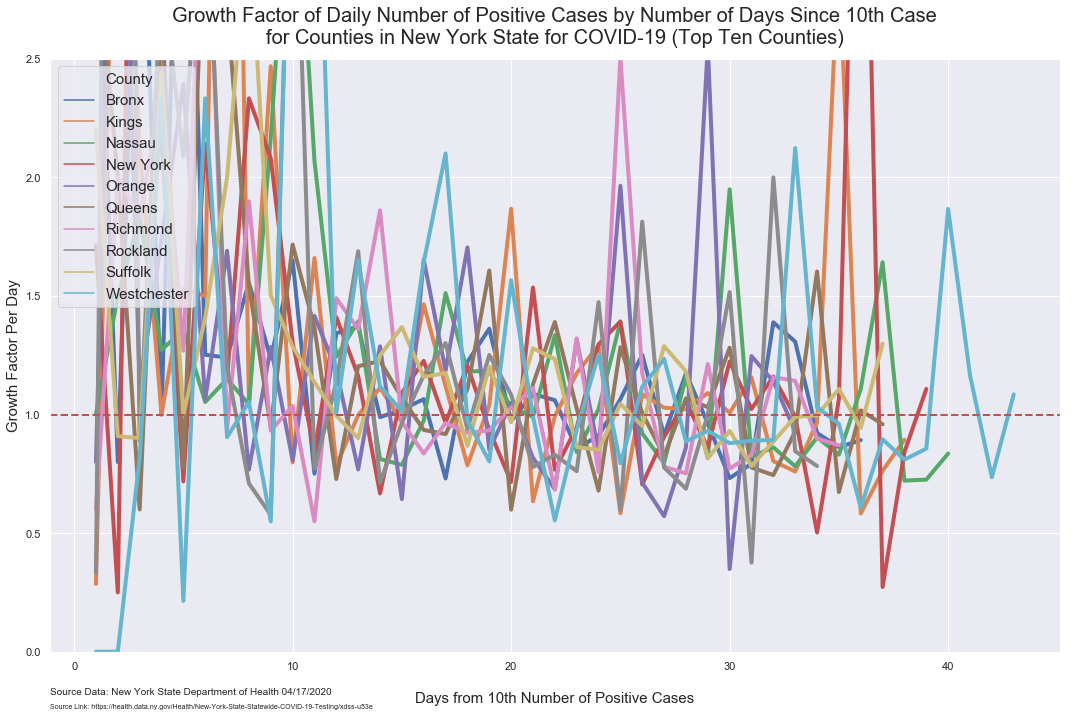

In [105]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="growth_rate",
             hue="County", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0, 2.5)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10')

In [106]:
growth_rate_weekly = growth_rate.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'growth_rate': np.mean})

In [107]:
growth_rate_weekly

days_from_10_cases  growth_rate
County      Test Date                                  
Bronx       2020-03-15                   3     2.586111
            2020-03-22                  10     1.739366
            2020-03-29                  17     1.038612
            2020-04-05                  24     1.067501
            2020-04-12                  31     0.984170
            2020-04-19                  36     1.074528
Kings       2020-03-15                   5     1.788025
            2020-03-22                  12     2.145196
            2020-03-29                  19     1.069778
            2020-04-05                  26     1.090069
            2020-04-12                  33     0.981220
            2020-04-19                  38     1.231674
Nassau      2020-03-15                   7     1.309405
            2020-03-22                  14     1.758028
            2020-03-29                  21     1.094516
            2020-04-05                  28     1.066269
            2020-04-12                  35     0.995011
            2020-04-19                  40     1.006663
New York    2020-03-15                   6     2.165293
            2020-03-22                  13     1.469841
            2020-03-29                  20     0.972363
            2020-04-05                  27     1.078276
            2020-04-12                  34     0.973725
            2020-04-19                  39     1.574029
Orange      2020-03-22                   7     1.864599
            2020-03-29                  14     1.074096
            2020-04-05                  21     1.129176
            2020-04-12                  28     0.993871
            2020-04-19                  33     1.243561
Queens      2020-03-15                   4     2.080556
            2020-03-22                  11     1.759744
            2020-03-29                  18     1.026767
            2020-04-05                  25     1.101763
            2020-04-12                  32     0.961914
            2020-04-19                  37     1.036320
Richmond    2020-03-15                   2     1.300000
            2020-03-22                   9     1.821780
            2020-03-29                  16     1.157488
            2020-04-05                  23     0.994985
            2020-04-12                  30     1.136036
            2020-04-19                  35     0.979674
Rockland    2020-03-15                   1     0.333333
            2020-03-22                   8     2.873373
            2020-03-29                  15     1.372693
            2020-04-05                  22     1.049928
            2020-04-12                  29     1.015501
            2020-04-19                  34     1.104074
Suffolk     2020-03-15                   4     1.613384
            2020-03-22                  11     1.635360
            2020-03-29                  18     1.102248
            2020-04-05                  25     1.063048
            2020-04-12                  32     0.976969
            2020-04-19                  37     1.067407
Westchester 2020-03-08                   3     0.272727
            2020-03-15                  10     1.587946
            2020-03-22                  17     1.766103
            2020-03-29                  24     1.011403
            2020-04-05                  31     0.961829
            2020-04-12                  38     1.045997
            2020-04-19                  43     1.141730

In [108]:
growth_rate_weekly.reset_index(inplace=True)
growth_rate_weekly.rename(columns={'growth_rate': 'growth_rate_weekly_average'}, inplace=True)

In [109]:
growth_rate_weekly

County  Test Date  days_from_10_cases  growth_rate_weekly_average
0         Bronx 2020-03-15                   3                    2.586111
1         Bronx 2020-03-22                  10                    1.739366
2         Bronx 2020-03-29                  17                    1.038612
3         Bronx 2020-04-05                  24                    1.067501
4         Bronx 2020-04-12                  31                    0.984170
5         Bronx 2020-04-19                  36                    1.074528
6         Kings 2020-03-15                   5                    1.788025
7         Kings 2020-03-22                  12                    2.145196
8         Kings 2020-03-29                  19                    1.069778
9         Kings 2020-04-05                  26                    1.090069
10        Kings 2020-04-12                  33                    0.981220
11        Kings 2020-04-19                  38                    1.231674
12       Nassau 2020-03-15                   7                    1.309405
13       Nassau 2020-03-22                  14                    1.758028
14       Nassau 2020-03-29                  21                    1.094516
15       Nassau 2020-04-05                  28                    1.066269
16       Nassau 2020-04-12                  35                    0.995011
17       Nassau 2020-04-19                  40                    1.006663
18     New York 2020-03-15                   6                    2.165293
19     New York 2020-03-22                  13                    1.469841
20     New York 2020-03-29                  20                    0.972363
21     New York 2020-04-05                  27                    1.078276
22     New York 2020-04-12                  34                    0.973725
23     New York 2020-04-19                  39                    1.574029
24       Orange 2020-03-22                   7                    1.864599
25       Orange 2020-03-29                  14                    1.074096
26       Orange 2020-04-05                  21                    1.129176
27       Orange 2020-04-12                  28                    0.993871
28       Orange 2020-04-19                  33                    1.243561
29       Queens 2020-03-15                   4                    2.080556
30       Queens 2020-03-22                  11                    1.759744
31       Queens 2020-03-29                  18                    1.026767
32       Queens 2020-04-05                  25                    1.101763
33       Queens 2020-04-12                  32                    0.961914
34       Queens 2020-04-19                  37                    1.036320
35     Richmond 2020-03-15                   2                    1.300000
36     Richmond 2020-03-22                   9                    1.821780
37     Richmond 2020-03-29                  16                    1.157488
38     Richmond 2020-04-05                  23                    0.994985
39     Richmond 2020-04-12                  30                    1.136036
40     Richmond 2020-04-19                  35                    0.979674
41     Rockland 2020-03-15                   1                    0.333333
42     Rockland 2020-03-22                   8                    2.873373
43     Rockland 2020-03-29                  15                    1.372693
44     Rockland 2020-04-05                  22                    1.049928
45     Rockland 2020-04-12                  29                    1.015501
46     Rockland 2020-04-19                  34                    1.104074
47      Suffolk 2020-03-15                   4                    1.613384
48      Suffolk 2020-03-22                  11                    1.635360
49      Suffolk 2020-03-29                  18                    1.102248
50      Suffolk 2020-04-05                  25                    1.063048
51      Suffolk 2020-04-12                  32                    0.976969
52      Suffolk 2020-04-19        

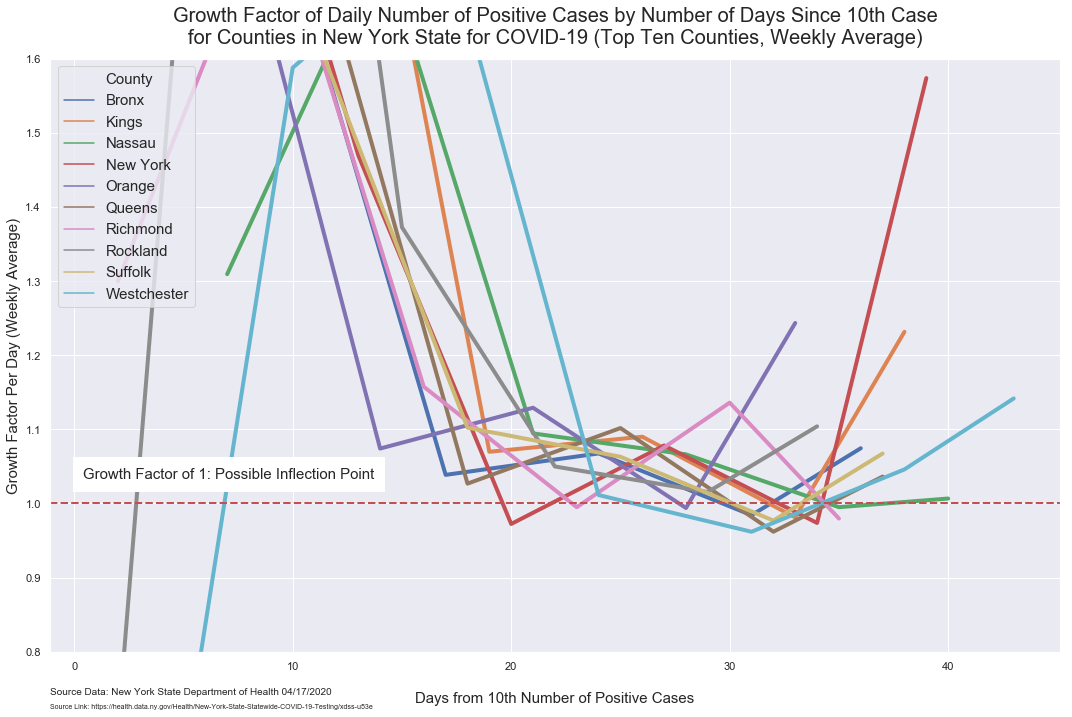

In [110]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')


sns.lineplot(x="days_from_10_cases", y="growth_rate_weekly_average",
             hue="County", data=growth_rate_weekly, linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0.8, 1.6)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day (Weekly Average)', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)
plt.figtext(0.08, 0.33, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10-weekly')

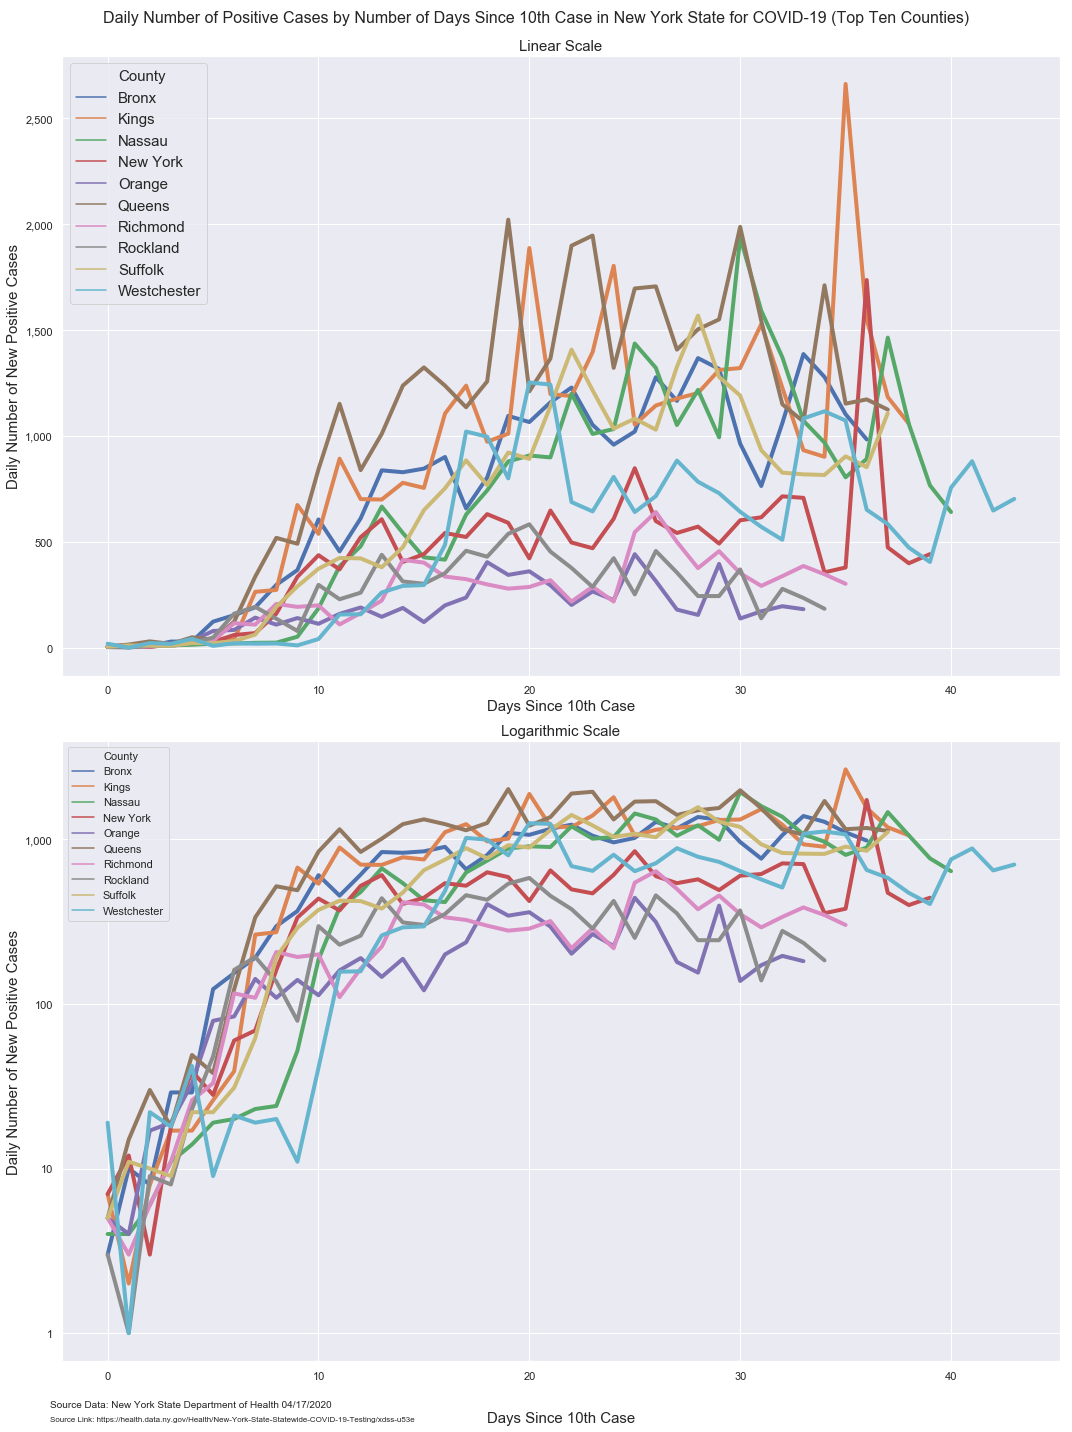

In [111]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,20))
fig.suptitle('Daily Number of Positive Cases by Number of Days Since 10th Case in New York State for COVID-19 (Top Ten Counties)', y = .99, fontsize=16)
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

# Plot 1
ax1 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.legend(loc='upper left', fontsize=15)


# Plot 2

ax2 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=temp_fill_zeros, linewidth=4)
ax2.set_yscale('log')

ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Setting Titles
ax1.set_title('\n\nLinear Scale', fontsize=15)
ax2.set_title('Logarithmic Scale', fontsize=15)

# Setting Labels
ax1.set_xlabel('Days Since 10th Case', fontsize=15)
ax2.set_xlabel('Days Since 10th Case', fontsize=15, labelpad = 20)
ax1.set_ylabel('Daily Number of New Positive Cases', fontsize=15)
ax2.set_ylabel('Daily Number of New Positive Cases', fontsize=15)

ax2.xaxis.labelpad = 30

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot1')

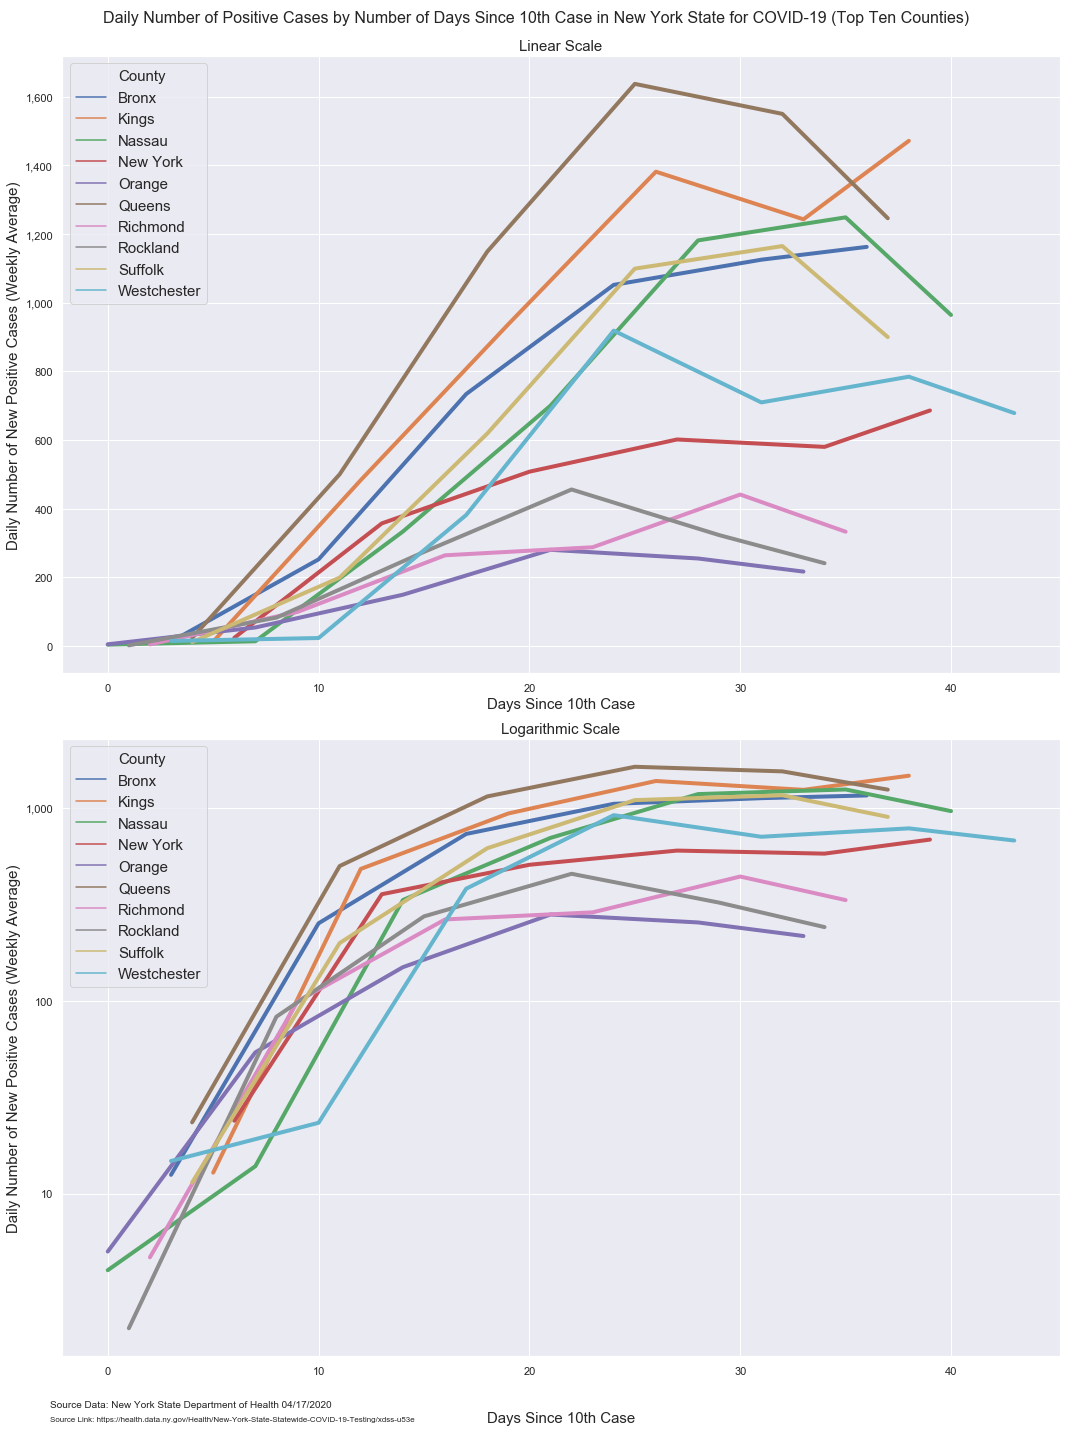

In [112]:
fig, [ax3, ax4] = plt.subplots(2, 1, figsize=(15,20))
fig.suptitle('Daily Number of Positive Cases by Number of Days Since 10th Case in New York State for COVID-19 (Top Ten Counties)', y = .99, fontsize=16)
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

# Plot 3
ax3 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4, ax=ax3)

ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3.legend(loc='upper left', fontsize=15)

# # Plot 4
ax4 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax4.set_yscale('log')

ax4.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax4.legend(loc='upper left', fontsize=15)

# Setting Labels
ax3.set_xlabel('Days Since 10th Case', fontsize=15)
ax4.set_xlabel('Days Since 10th Case', fontsize=15)
ax3.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)
ax4.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)


# Setting Titles
ax3.set_title('\n\nLinear Scale', fontsize=15)
ax4.set_title('Logarithmic Scale', fontsize=15)

ax4.xaxis.labelpad = 35

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot2')

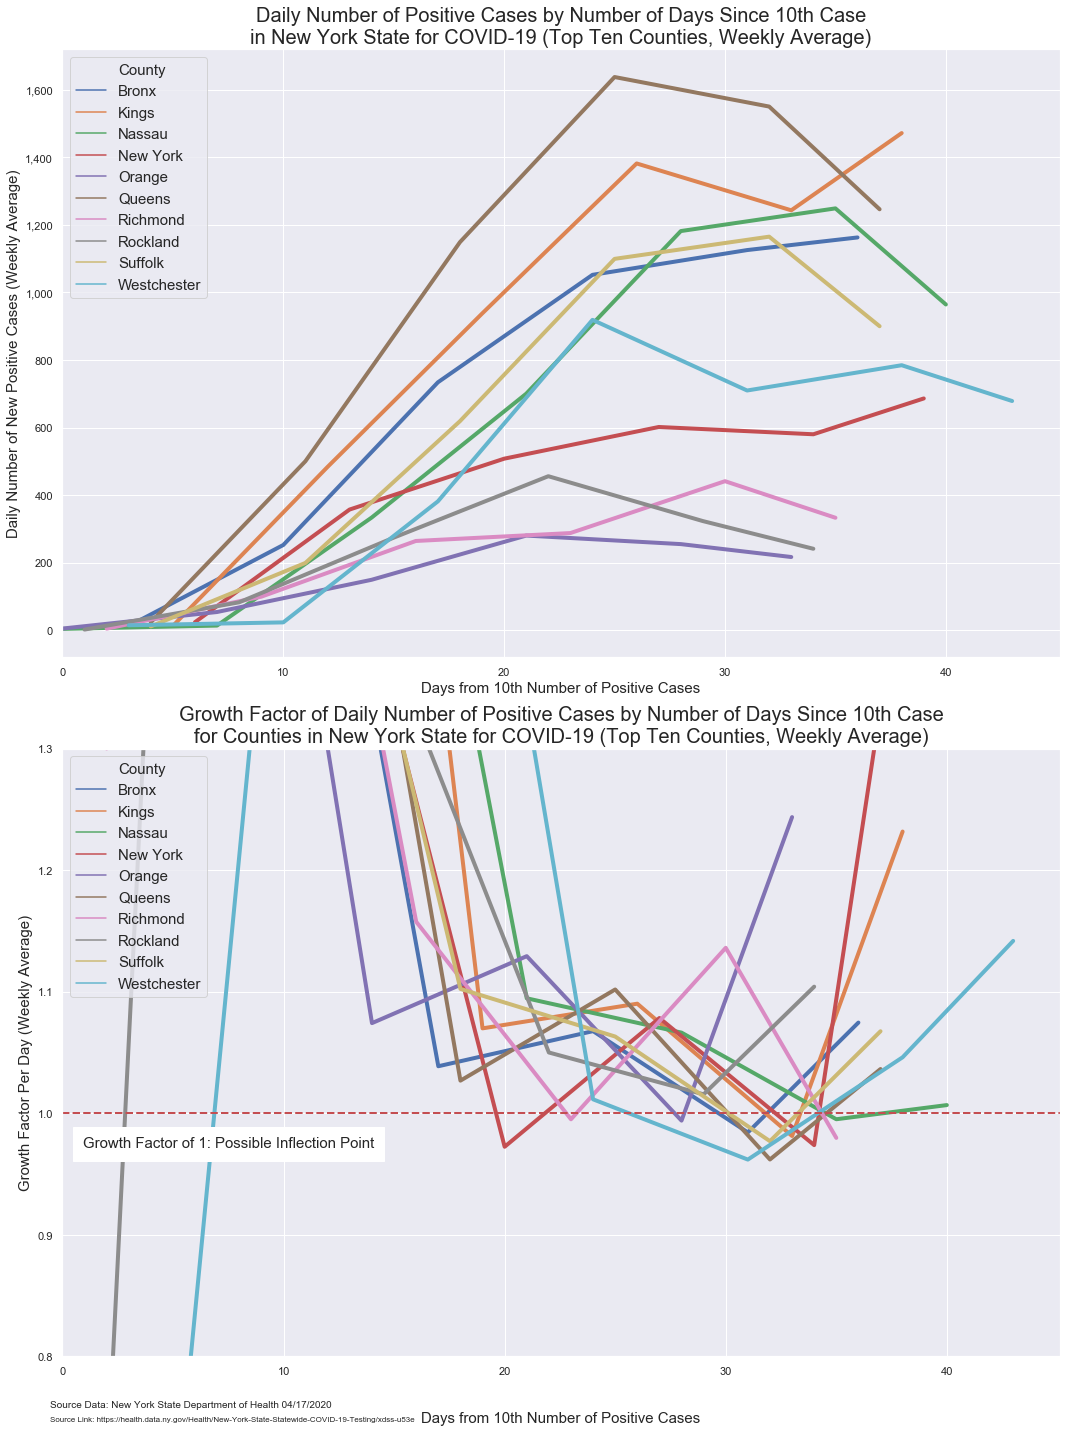

In [113]:
fig, [ax3, ax4] = plt.subplots(2, 1, figsize=(15,20))

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')

# Plot 3
ax3 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4, ax=ax3)

ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.legend(loc='upper left', fontsize=15)
plt.xlim(0)

# # Plot 4
ax4 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="growth_rate_weekly_average",
             hue="County", data=growth_rate_weekly, linewidth=4)

ax4.axhline(1, color='r', lw=2, linestyle='dashed')
ax4.legend(loc='upper left', fontsize=15)
ax4.xaxis.labelpad = 20
plt.ylim(0.8, 1.3)
plt.xlim(0)

# Setting Labels
ax3.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax4.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax3.set_ylabel('Daily Number of New Positive Cases (Weekly Average)', fontsize=15)
ax4.set_ylabel('Growth Factor Per Day (Weekly Average)', fontsize=15)
ax4.xaxis.labelpad = 35


# Setting Titles
ax3.set_title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average)', 
              fontsize=20)
ax4.set_title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties, Weekly Average)', 
              fontsize=20)

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)
plt.figtext(0.08, 0.2, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))

plt.tight_layout()
plt.savefig('figures/daily_cases_subplot3')

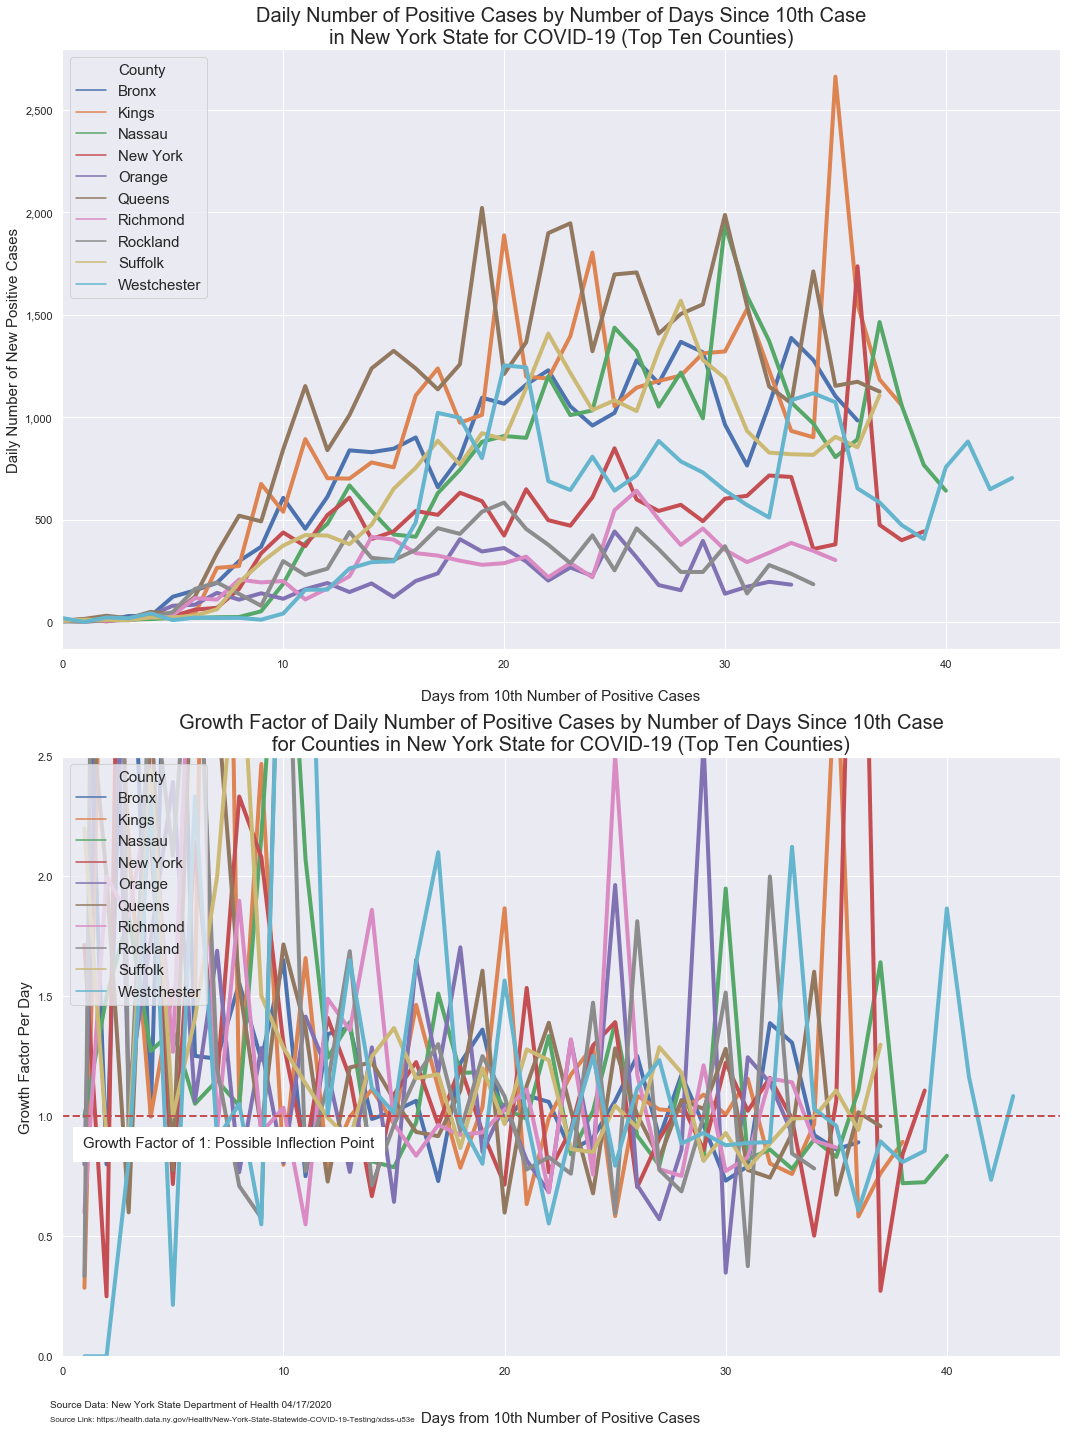

In [114]:
fig, [ax0, ax1] = plt.subplots(2, 1, figsize=(15,20))

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
txt3 = ('Growth Factor of 1: Possible Inflection Point')

# Plot 3
ax0 = plt.subplot(211)
sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax0.xaxis.labelpad = 20
ax0.legend(loc='upper left', fontsize=15)
plt.xlim(0)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)

# # Plot 4
ax1 = plt.subplot(212)
sns.lineplot(x="days_from_10_cases", y="growth_rate",
             hue="County", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')
ax1.xaxis.labelpad = 20
plt.ylim(0, 2.5)
ax1.legend(loc='upper left', fontsize=15)
plt.xlim(0)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)

# Setting Labels
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax0.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax0.set_ylabel('Daily Number of New Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day', fontsize=15)


# Setting Titles
ax0.set_title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', 
              fontsize=20)
ax1.set_title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', 
              fontsize=20)

ax1.xaxis.labelpad = 35

plt.figtext(0.05, 0.02, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=8)
plt.figtext(0.08, 0.2, txt3, wrap=True, horizontalalignment='left', fontsize=15, bbox=dict(facecolor='white', edgecolor='white', pad=10.0))


plt.tight_layout()
plt.savefig('figures/daily_cases_subplot4')